# Preface:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools


df = pd.read_csv("Data/train.csv", parse_dates = ["Order Date", "Ship Date"], dayfirst = True,
                dtype = {
                    "Order ID": "category",
                    "Ship Mode" : "category",
                    "Customer ID" : "category",
                    "Segment" : "category",
                    "Country" : "category",
                    "City" : "category",
                    "State" : "category",
                    "Postal Code" : "category",
                    "Region" : "category",
                    "Product ID" : "category",
                    "Category" : "category",
                    "Sub-Category" : "category",
                    "Product Name" : "category"
                }
                )

df.head(10)
df.tail(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9790,9791,CA-2018-144491,2018-03-27,2018-04-01,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Houston,Texas,77070,Central,FUR-CH-10001714,Furniture,Chairs,"Global Leather & Oak Executive Chair, Burgundy",211.246
9791,9792,CA-2015-127166,2015-05-21,2015-05-23,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Houston,Texas,77070,Central,OFF-EN-10003134,Office Supplies,Envelopes,Staple envelope,56.064
9792,9793,CA-2015-127166,2015-05-21,2015-05-23,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Houston,Texas,77070,Central,FUR-CH-10003396,Furniture,Chairs,Global Deluxe Steno Chair,107.772
9793,9794,CA-2015-127166,2015-05-21,2015-05-23,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Houston,Texas,77070,Central,OFF-PA-10001560,Office Supplies,Paper,"Adams Telephone Message Books, 5 1/4” x 11”",4.832
9794,9795,CA-2015-127166,2015-05-21,2015-05-23,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Houston,Texas,77070,Central,OFF-BI-10000977,Office Supplies,Binders,Ibico Plastic Spiral Binding Combs,18.240
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9799,9800,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


# Introduction
The focus of this project will be on answering the following questions:
### General Questions
1. How many items are sold on each order
1. What is the distribution of sales?
1. What are the statistics of each main category?
1. What portion of sales does each Category represent?
1. What is the percentage of each category that is made up of its sub categories?
### Product & Category Behavior
1. Which product categories are sold together? Which product sub categories are sold together?
1. Are there Categories, Sub-Categories, or Products that trend amongs certain segments?
1. Does the popularity of products change over time?
### Customer Behavior
1. How does customer segment impact ordering habits? (Sales, number of order)
1. How many orders are from repeat customers -> do some additional statistics on this how many orders do the customers make, are the values of the orders consistent? Bin customers by number of orders and see if they spend different amounts per transaction?
1. What is the revenue breakdown? (One time customer vs repeat)
1. How does sales break down per customer? (Build a distribution that shows % of customers vs % of sales, 5% customers give 50% sales etc.)
1. What is the average time it takes for a customer to reorder?
1. Is total spend indicative of more orders or just higher value orders?
1. How does Ship Mode relate to order price and customer segment?
1. How do  seasonal sales trends vary across Regions and Segments?
### Geography (If Time)
1. What are the outlying states for purchase amount and frequency?
1. What are the outlying cities for purchase amount and frequency?
1. How are sales broken down by state and then within each state at the city level?
1. If additional time is available, map the sales by state as a whole and by individual cities







# General Exploration
This section is for general exploration and clean up of the data before moving on to answer the various questions.

In [2]:
df.select_dtypes(include = 'category').apply(lambda col: col.nunique())
#print((df.dtypes))

Order ID        4922
Ship Mode          4
Customer ID      793
Segment            3
Country            1
City             529
State             49
Postal Code      626
Region             4
Product ID      1861
Category           3
Sub-Category      17
Product Name    1849
dtype: int64

In [3]:
print(df.columns[df.isna().any()])
print(df[['Order ID', 'Customer ID', 'State', 'City', 'Postal Code']][df.isna().any(axis=1)])
#print('\n The count of empty strings is:', (df == '').sum()) #returned 0

#5 unique customers are affected by the missing postal code for burlington vermont.

Index(['Postal Code'], dtype='object')
            Order ID Customer ID    State        City Postal Code
2234  CA-2018-104066    QJ-19255  Vermont  Burlington         NaN
5274  CA-2016-162887    SV-20785  Vermont  Burlington         NaN
8798  US-2017-150140    VM-21685  Vermont  Burlington         NaN
9146  US-2017-165505    CB-12535  Vermont  Burlington         NaN
9147  US-2017-165505    CB-12535  Vermont  Burlington         NaN
9148  US-2017-165505    CB-12535  Vermont  Burlington         NaN
9386  US-2018-127292    RM-19375  Vermont  Burlington         NaN
9387  US-2018-127292    RM-19375  Vermont  Burlington         NaN
9388  US-2018-127292    RM-19375  Vermont  Burlington         NaN
9389  US-2018-127292    RM-19375  Vermont  Burlington         NaN
9741  CA-2016-117086    QJ-19255  Vermont  Burlington         NaN


In [4]:
#Do these lists look set up correctly?
for col in ['Ship Mode', 'Segment', 'Region', 'Category', 'Sub-Category']: #these are short enough where reading explicitly may have benefit
    print(col, list(df[col].unique()), '\n')  #changing to a list lets it print easier.

Ship Mode ['Second Class', 'Standard Class', 'First Class', 'Same Day'] 

Segment ['Consumer', 'Corporate', 'Home Office'] 

Region ['South', 'West', 'Central', 'East'] 

Category ['Furniture', 'Office Supplies', 'Technology'] 

Sub-Category ['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage', 'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper', 'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines', 'Copiers'] 



Of the lists viewed none appear to have duplicate entries or problems.

In [5]:
#What states are missing?

all_states = {
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado",
    "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho",
    "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana",
    "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota",
    "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada",
    "New Hampshire", "New Jersey", "New Mexico", "New York",
    "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon",
    "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota",
    "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington",
    "West Virginia", "Wisconsin", "Wyoming"
}

#print(all_states - set(df['State'].unique()))
#print(list(df['State'].unique()))

The states used are the continental states with the addition of DC for the purpose of shipping. Hawaii and Alaska aren't part of the sales data.

In [6]:
#Why is there 1861 unique product Id's and only 1849 product names?

pot_duplicate_name = df.groupby('Product Name', observed = False)['Product ID'].nunique()
pot_duplicate_name = pot_duplicate_name[pot_duplicate_name > 1]

print(pot_duplicate_name.sum(), len(pot_duplicate_name))
#print(pot_duplicate_name)


pot_duplicate_id = df.groupby('Product ID', observed = False)['Product Name'].nunique()
pot_duplicate_id = pot_duplicate_id[pot_duplicate_id > 1]

print(pot_duplicate_id.sum(), len(pot_duplicate_id))
#print(df.groupby('Product ID', observed = False)['Product Name'].unique())

60 16
64 32


There are 60 occurrences where a product name is associated with multiple product id's increasing the number of product Id's by 44.
There are 64 occurrences where a product Id is used for more than 1 name meaning there should be 32 less prodcut Id's. 

44 - 32 explains the 12 ID discrepancy.

# General Questions
1. How many items are sold on each order?
1. What is the price distribution of items sold?
1. What are the statistics of each main category?
1. What portion of sales does each Category represent?
1. What is the percentage of each category that is made up of its sub categories?

## Questions 1: How many items are sold on each order?

In [7]:
#1 Code
print(df.groupby('Order ID', observed = False)['Sales'].count().describe()) #basic statistics about how many items are on each order
items_per_order = df.groupby('Order ID', observed = False)['Sales'].count()
print(items_per_order.value_counts())

count    4922.000000
mean        1.991061
std         1.406115
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        14.000000
Name: Sales, dtype: float64
Sales
1     2499
2     1198
3      590
4      333
5      153
6       69
7       48
8       15
9       10
10       3
11       2
14       1
12       1
Name: count, dtype: int64


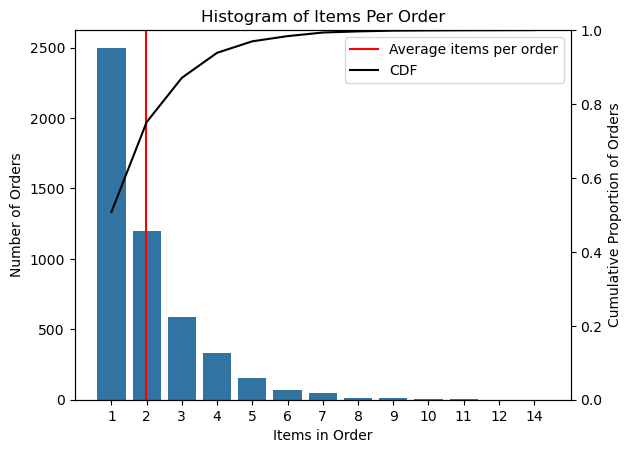

In [8]:
# Type of graph that is valuable in this case is one that displays the general shape of the data.
# CDF adds a stronger understanding of how it fits in with total transaction counts

counts = items_per_order.value_counts().sort_index()
cdf = counts.cumsum() / counts.sum()

fig, ax1 = plt.subplots() #define subplots to allow for CDF

sns.barplot(x = counts.index, y = counts.values)
plt.axvline(items_per_order.mean()-1,  label = "Average items per order", color = 'Red')
plt.title("Histogram of Items Per Order")
plt.xlabel("Items in Order") 
plt.ylabel("Number of Orders")


bar_locs = ax1.get_xticks()
ax2 = ax1.twinx()
ax2.plot(bar_locs, cdf, label='CDF', color = 'Black')
ax2.set_ylabel("Cumulative Proportion of Orders")
ax2.set_ylim(0, 1)

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc="upper right")
plt.show()
#print(counts)
#print(cdf)

### Question 1: Assessment
The plot demonstrates that the vast majority of orders contain 1 or 2 items, this is shown by the 75th percentile being 2 from .describe above, but reinforced by the cumulative proportion showing that it is 75.11%. It is also interesting that no one purchased 13 items.

## Question 2: What is the distribution of sales?

In [9]:
#this problem statement was originally around price of each item sold, but that isn't given by the data set. There is no clean way to tell if the customer ordered 1 or 30 of an individual line item.
#2 Code
print('\nStatistics about the value of the sale for each type of item sold:\n', df['Sales'].describe())
print('\nThe median value of sales is\n', df['Sales'].median())


Statistics about the value of the sale for each type of item sold:
 count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: Sales, dtype: float64

The median value of sales is
 54.489999999999995


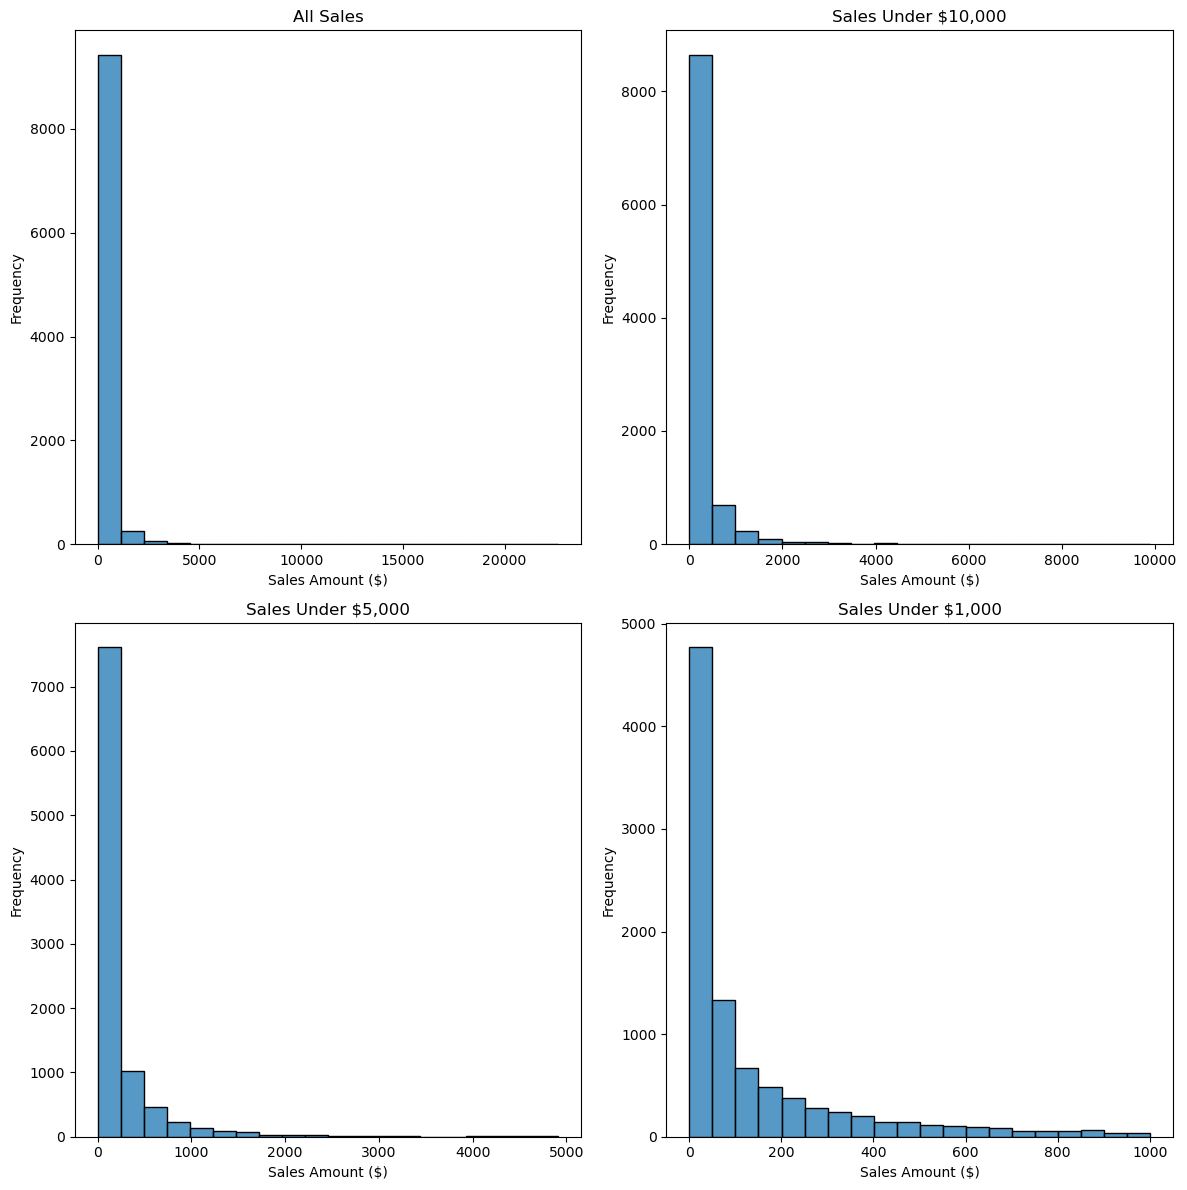

In [10]:
#the best visual exploration for this data is assessing the distribution and trying to decipher any patterns

fig, axes = plt.subplots(2, 2, figsize = [12, 12])

plt.title("Distribution of Sales") 
plt.xlabel("Sales Amount ($)")
plt.ylabel("Frequency")

sns.histplot(df['Sales'], bins = 20, ax = axes[0,0]) #default gives too many bins
axes[0,0].set_title("All Sales")
axes[0,0].set_xlabel("Sales Amount ($)")
axes[0,0].set_ylabel("Frequency")

sns.histplot(df[df['Sales'] < 10000]['Sales'], bins = 20, ax = axes[0,1]) #default gives too many bins
axes[0,1].set_title("Sales Under $10,000")
axes[0,1].set_xlabel("Sales Amount ($)")
axes[0,1].set_ylabel("Frequency")

sns.histplot(df[df['Sales'] < 5000]['Sales'], bins = 20, ax = axes[1,0])
axes[1,0].set_title("Sales Under $5,000")
axes[1,0].set_xlabel("Sales Amount ($)")
axes[1,0].set_ylabel("Frequency")

sns.histplot(df[df['Sales'] < 1000]['Sales'], bins = 20, ax = axes[1,1])
axes[1,1].set_title("Sales Under $1,000")
axes[1,1].set_xlabel("Sales Amount ($)")
axes[1,1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

### Question 2: Assesment
The distribution of sales per line item shows that it is primarily under \\$210.60 with that being the 75th percentile. The mean being \\$230.77 is disproportionately impacted by a small amount of transactions that are significantly higher. The maximum transaction value of \\$22,638.48 is 100x higher than the mean, but the frequency of sales above the mean is shown to rapidly fall of in the "Sales under \\$1,000" chart. The mean and median beingg so far apart also shows the data is not normally distributed.


## Question 3: What are the statistics of each main category?

In [11]:
#3
print('\nStatisticas about categories\n', df.groupby(['Category'], observed = False)['Sales'].describe()) #There is a wildly expensive technology item. Digging into this more there is not a quantity column. Different product ID's will have different sales.
#print(df[df['Sales'] == df['Sales'].max()])


Statisticas about categories
                   count        mean          std    min    25%      50%  \
Category                                                                  
Furniture        2078.0  350.653790   501.489219  1.892  47.19  182.610   
Office Supplies  5909.0  119.381001   383.761427  0.444  11.76   27.360   
Technology       1813.0  456.401474  1116.818701  0.990  67.98  167.944   

                     75%        max  
Category                             
Furniture        435.237   4416.174  
Office Supplies   79.470   9892.740  
Technology       453.576  22638.480  


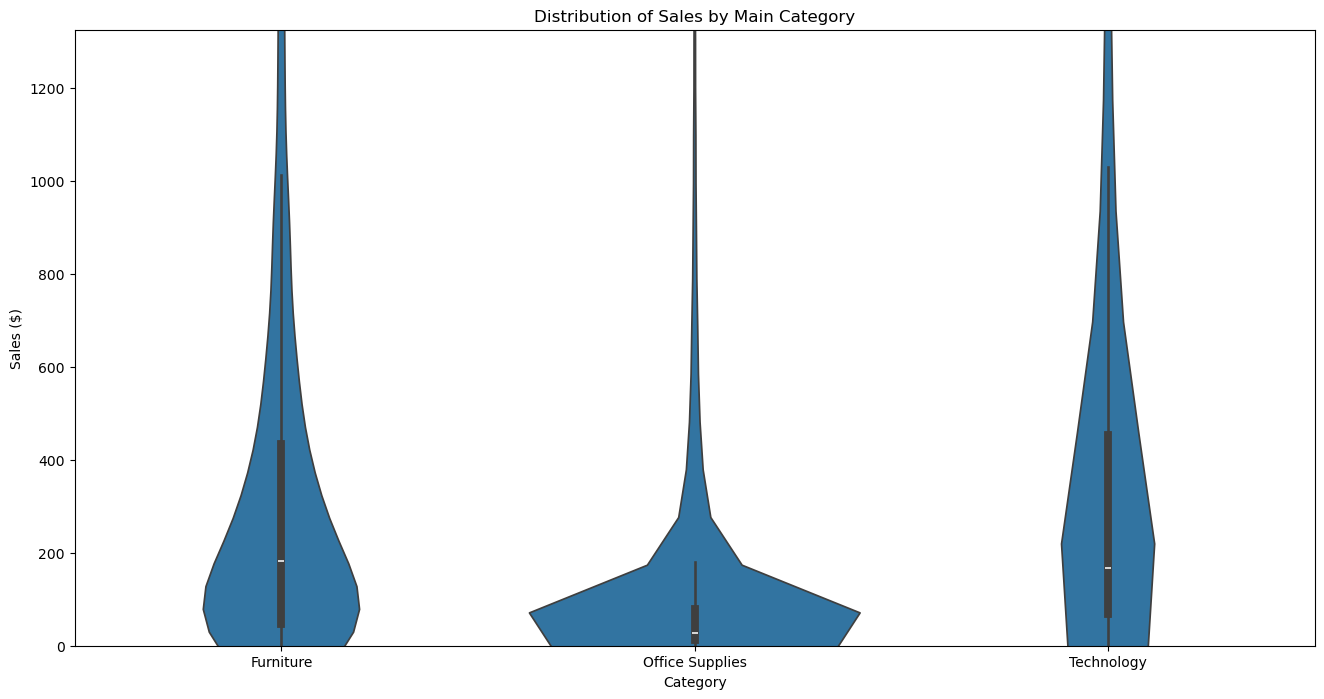

In [12]:
plt.figure(figsize = (16, 8))
sns.violinplot(data=df, x='Category', y='Sales', 
#    scale='width'            # makes each violin the same width, leaving off to allow for cross category comparison
)

plt.title("Distribution of Sales by Main Category")
plt.xlabel("Category")
plt.ylabel("Sales ($)")
#plt.yscale('log') #the log scale does not align with how I think of finances, but does even out the heights with how skewed the data is
plt.ylim(0, df['Sales'].quantile(0.97)) #the vertical shape of the violins gets lost if we don't clip some of the data off the top. The top is very narrow and follows the lines already formed.
plt.show()

### Question 3: Assesment
Office supplies are the most frequently sold items, with a count of 5909, and has a heavy concentration towards lowers sales per line item. Furniture represents a lower volume of sales frequency, 2078, overall than office supplies but the sales per line is shifting upward. Technology represents the lowest volume of sales frequency, 1813, and has shifted to the highest price per line item. Although the 75th percentile for sales of furniture and technology is about the same in the mid \\$400 range. Office supplies 75th percentile only lands at about \\$80.

## Question 4: What portion of sales does each Category represent?

In [13]:
#4 Total sales and category output
#print(df['Sales'].sum())
#print(df.groupby(['Category'], observed = False)['Sales'].sum())

quantile_trim = 0.99
category_trim_limit = df.groupby('Category', observed = True)['Sales'].transform(lambda x: x.quantile(quantile_trim))

#removed_upper_outliers = df['Sales'].quantile(.99)
df_under_removed_upper_outliers = df[df['Sales'] <= category_trim_limit]
trimmed_category_sales = (
    df_under_removed_upper_outliers
    .groupby('Category', observed = True)['Sales']
    .sum()
    .to_frame(name='Category Sales')
)
trimmed_category_sales['Portion of Total'] = trimmed_category_sales['Category Sales'] / trimmed_category_sales['Category Sales'].sum()
print('\nTrimmed data set\n', trimmed_category_sales)

category_sales = df.groupby(['Category'], observed = False)['Sales'].sum().to_frame(name = 'Category Sales')
category_sales['Portion of Total'] = category_sales['Category Sales'] / df['Sales'].sum()
print('\nFull data set\n', category_sales) 

print('\nFull sales:', df['Sales'].sum(), '\nTrimmed sales:', trimmed_category_sales['Category Sales'].sum())


Trimmed data set
                  Category Sales  Portion of Total
Category                                         
Furniture           659937.1027          0.356023
Office Supplies     530383.5980          0.286131
Technology          663315.4880          0.357846

Full data set
                  Category Sales  Portion of Total
Category                                         
Furniture           728658.5757          0.322196
Office Supplies     705422.3340          0.311922
Technology          827455.8730          0.365882

Full sales: 2261536.7827000003 
Trimmed sales: 1853636.1886999998


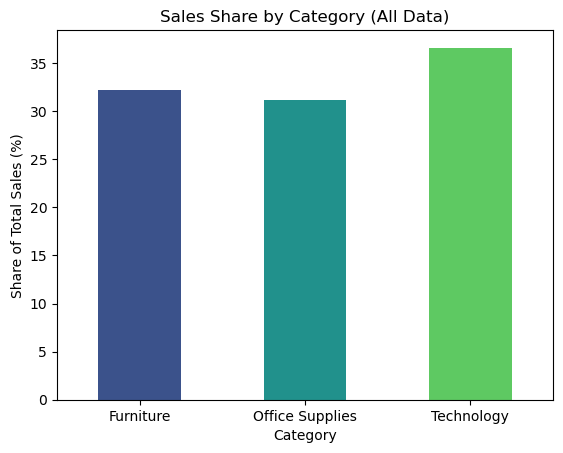

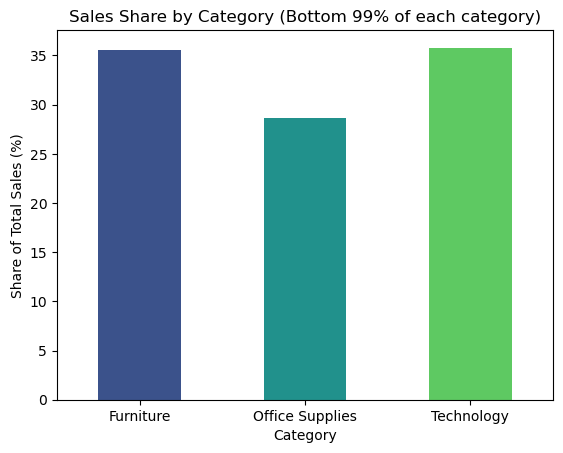

In [14]:
(category_sales['Portion of Total']*100).plot(kind = 'bar',
                                        ylabel = 'Share of Total Sales (%)',
                                        title = 'Sales Share by Category (All Data)',
                                       color = sns.color_palette("viridis", n_colors = 3)
                                       )
plt.xticks(rotation = 0) #make the labels horizontal
plt.show()
sns.set_palette("deep") #set back to default after
(trimmed_category_sales['Portion of Total']*100).plot(kind = 'bar',
                                        ylabel = 'Share of Total Sales (%)',
                                        title = f"Sales Share by Category (Bottom {quantile_trim*100:.0f}% of each category)",
                                       color = sns.color_palette("viridis", n_colors = 3)
                                       )
plt.xticks(rotation = 0) #make the labels horizontal
plt.show()



### Questions 4: Assesment
Each category of sales represents a roughly equal portion. Furniture makes up 32%, Office Supplies 31%, and Technology 37%. It does take a drastically different number of line item occurences to get there though, 5809 for Office Supplies, 2078 for Furniter, and only 1813 for Technology. The bottom 99% of each category plot was generated to see if the extreme outlier in electronics skewed the data so so it had disproportionate share of total sales. Technologies share did not shift drastically based on this. I was surprised to see that office supplies was so negatively impacted by removing its top 1% of lines.

## Question 5: What is the percentage of each category that is made up of its sub categories?

In [15]:
#5 Total sales of each category found in question 4
#print(df.groupby(['Category'], observed = False)['Sales'].sum().to_frame(name = 'Category Sales'))
#print(df.groupby(['Category','Sub-Category'], observed = True)['Sales'].sum())

cat_breakdown = df.groupby(['Category'], observed = False)['Sales'].sum().to_frame(name = 'Category Sales')
sub_cat_breakdown = df.groupby(['Category','Sub-Category'], observed = True)['Sales'].sum().to_frame('Sub-Category Sales')
cat_sub_cat_breakdown = sub_cat_breakdown.join(cat_breakdown, on='Category')
cat_sub_cat_breakdown['Proportion of Category'] = cat_sub_cat_breakdown['Sub-Category Sales'] / cat_sub_cat_breakdown['Category Sales']

print(cat_sub_cat_breakdown)


                              Sub-Category Sales  Category Sales  \
Category        Sub-Category                                       
Furniture       Bookcases            113813.1987     728658.5757   
                Chairs               322822.7310     728658.5757   
                Furnishings           89212.0180     728658.5757   
                Tables               202810.6280     728658.5757   
Office Supplies Appliances           104618.4030     705422.3340   
                Art                   26705.4100     705422.3340   
                Binders              200028.7850     705422.3340   
                Envelopes             16128.0460     705422.3340   
                Fasteners              3001.9600     705422.3340   
                Labels                12347.7260     705422.3340   
                Paper                 76828.3040     705422.3340   
                Storage              219343.3920     705422.3340   
                Supplies              46420.3080

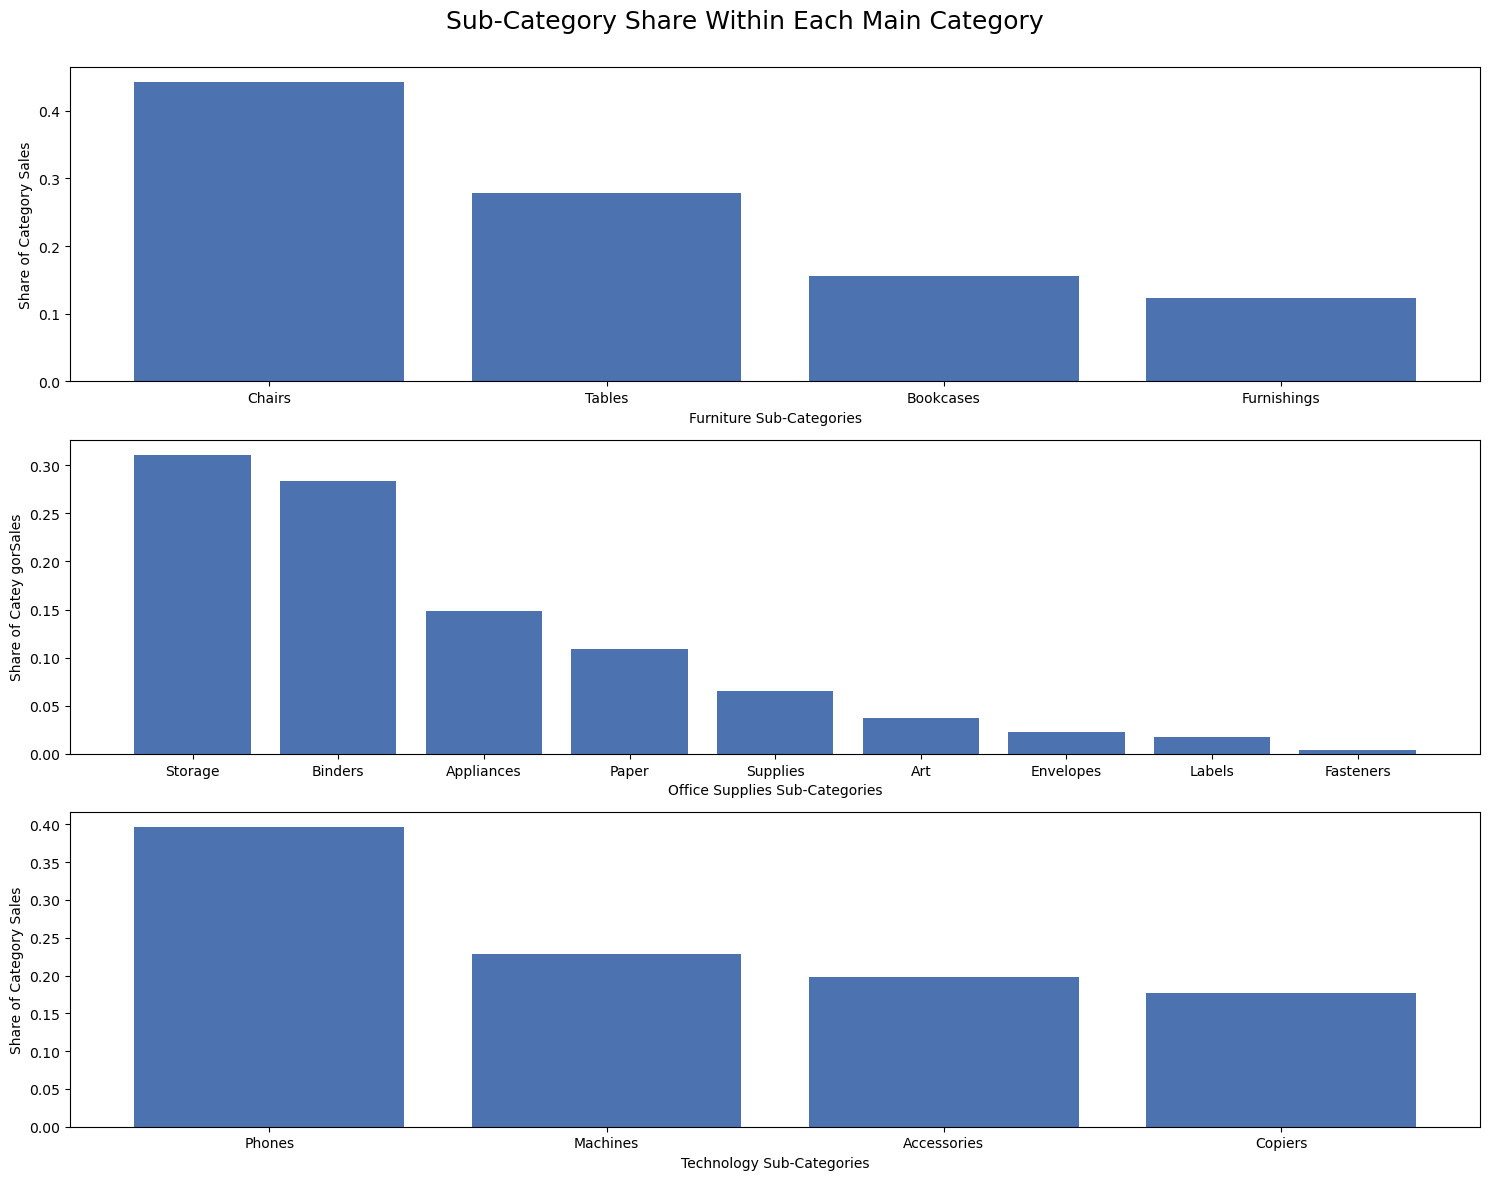

In [16]:
#best plot style is a bar chart to see them all side by side, single bar for each sub category, alternative is stacked bar but comparison between categories may not appropriate.
categories = cat_sub_cat_breakdown.index.get_level_values('Category').unique()
fig, axes = plt.subplots(3, 1, figsize=(15, 12), sharex=False)

for ax, cat in zip(axes, categories): #zip to pair up axes and categories
    # Slice data for this category and sort by share descending
    data = (
        cat_sub_cat_breakdown.xs(cat) #.xs to multi slice and get the sub category name and proportion with less code
              .sort_values('Proportion of Category', ascending=False) #lists the categories by decending proportion to look more appealing
    )

    ax.bar(data.index, data['Proportion of Category'])
    ax.set_xlabel(cat + " Sub-Categories")

axes[0].set_ylabel("Share of Category Sales")
axes[1].set_ylabel("Share of Catey gorSales")
axes[2].set_ylabel("Share of Category Sales")

fig.suptitle("Sub-Category Share Within Each Main Category\n", fontsize = 18)
#fig.supxlabel("Sub-Category") #doesn't look quite as good as labeling individually
#fig.supylabel("Share of Category Sales") #doesn't look quite as good as labeling individually
plt.tight_layout()
plt.show()

### Question 5: Assesment

The data shows that technology has a more even distribution of porportions with the exception Phones being a large front runner. Office supplies has a couple pairs (Storage and Binders, Envelopes and Labels) of relatively close proportions but the remainder have pretty prominent gaps. Furniture has the two lowest (Bookcases and Furnishings) relatively even, but prominent gaps between product types are still visible creating a drop off.

# Product & Category Behavior
1. Which product categories are sold together? Which product sub categories are sold together?
1. Are there Categories, Sub-Categories, or Products that trend amongs certain segments?
1. Does the popularity of products change over time?

## Questions 1: Which product categories are sold together? Which product sub categories are sold together?

In [17]:
unique_cats_per_order = df.groupby(['Order ID'], observed = True)['Category'].unique().to_frame('Categories')
pairs = [] 

for categories in unique_cats_per_order:
    if len(categories) == 2:
        pairs.extend(itertools.combinations(sorted(categories), 2))
category_pairs = (pd.Series(pairs).value_counts().to_frame('Count'))
#print(category_pairs)
#print(unique_cats_per_order)


#cats_per_order = df.groupby(['Order ID'], observed = True)['Category'].nunique() #Figures out how man categories are in an order
#multiple_cat_orders = cats_per_order[cats_per_order > 1]
#print(len(multiple_cat_orders)) #determines how many orders have more than 2 categories
#print(cats_per_order.value_counts()) #Determines the number of categories per order

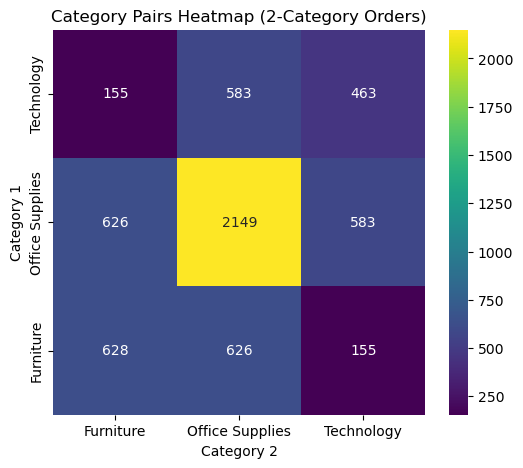

In [18]:
orders_2cats = unique_cats_per_order['Categories'][unique_cats_per_order['Categories'].apply(len) == 2]

pairs = [tuple(sorted(categories)) for categories in orders_2cats]

category_pairs = (
    pd.Series(pairs)
      .value_counts()
      .to_frame('Count')
)
#print(category_pairs)


pair_counts = category_pairs['Count'].copy()
pair_counts.index = pd.MultiIndex.from_tuples(
    pair_counts.index, names=['Category1', 'Category2']
)

heatmap_data = pair_counts.unstack(fill_value=0)

all_cats = sorted(df['Category'].unique())
heatmap_data = heatmap_data.reindex(index=all_cats, columns=all_cats, fill_value=0)

mask = unique_cats_per_order['Categories'].apply(len) == 1
single_cat_orders = unique_cats_per_order.loc[mask, 'Categories']
single_cat_counts = single_cat_orders.explode().value_counts()

heatmap_data = heatmap_data + heatmap_data.T
heatmap_data = heatmap_data.reindex(index=heatmap_data.index[::-1])
for cat in heatmap_data.index:
    heatmap_data.loc[cat, cat] = single_cat_counts.get(cat, 0)



plt.figure(figsize=(6,5))
sns.heatmap(heatmap_data, annot = True, cmap = "viridis", fmt = "d")
plt.title("Category Pairs Heatmap (2-Category Orders)")
plt.ylabel("Category 1")
plt.xlabel("Category 2")
plt.show()

### Questions 1: Assessment
The majority of orders only contained 1 category of items, in total 3240 orders represent that, there are 1364 orders that had 2 categories, and 318 orders that contained all 3 categories. The Furniture Furniture cell represents the number of orders with only that category, same for office supplies and technology. This shows that 2149 of the 3240 were office supplies while furniture with 628 and 463 for technology are much closer. My interpretation from the heatmap plot is that customers are ordering a particular item and may add addtional items in the same category but they are either not seeing the other categories as an availability while ordering or just aren't enticed to order more from other categories. This may be due to how people group orders in their mind.

## Question 2: Are there Categories, Sub-Categories, or Products that trend amongs certain segments?

In [19]:
#print(df.groupby(['Segment'], observed = True)['Order ID'].nunique()) #how many transactions did each segment have
#print(df.groupby(['Segment'], observed = True)['Category'].value_counts()) #what were the counts of unique items purchased for each category
#print('\neye break\n')
#print(df.groupby(['Segment', 'Category', 'Sub-Category'], observed = True).size().reset_index (name = 'Count')) #What are the counts for unique sub categories

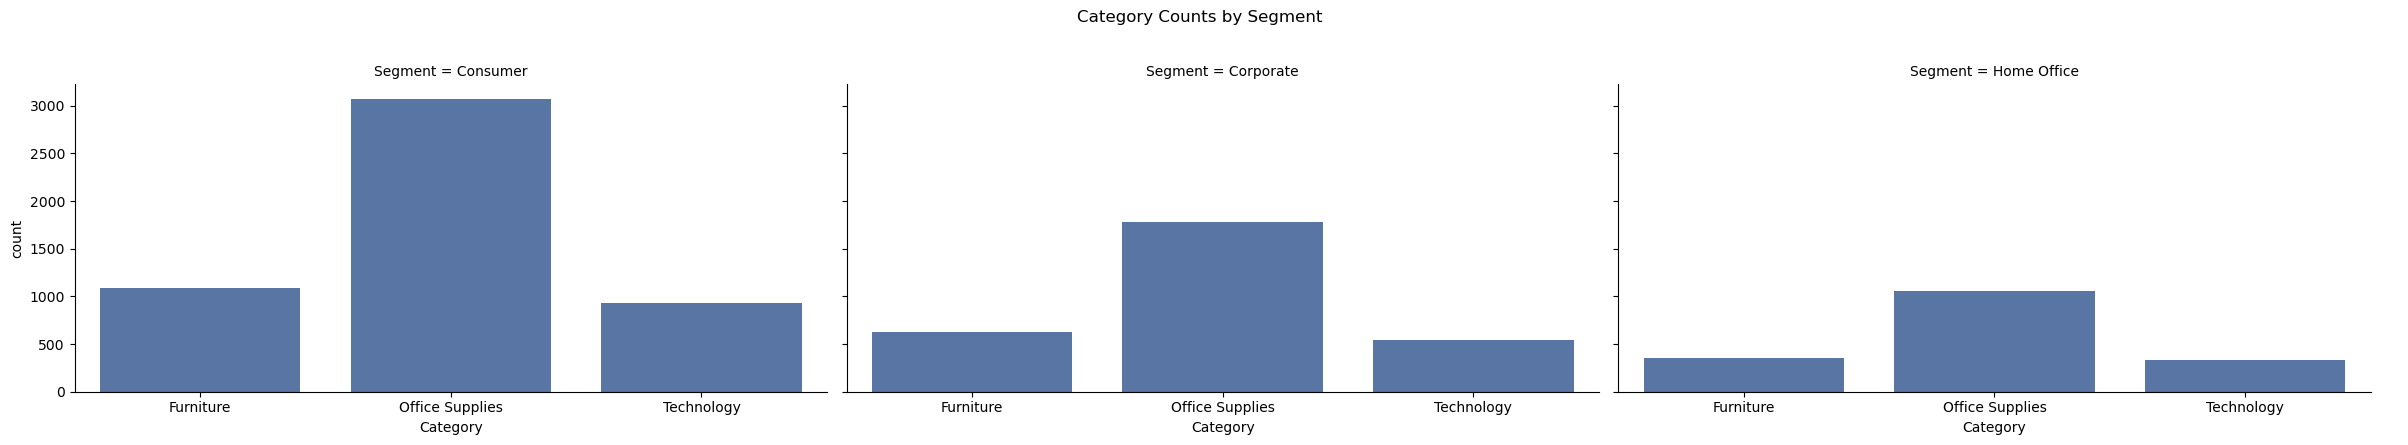

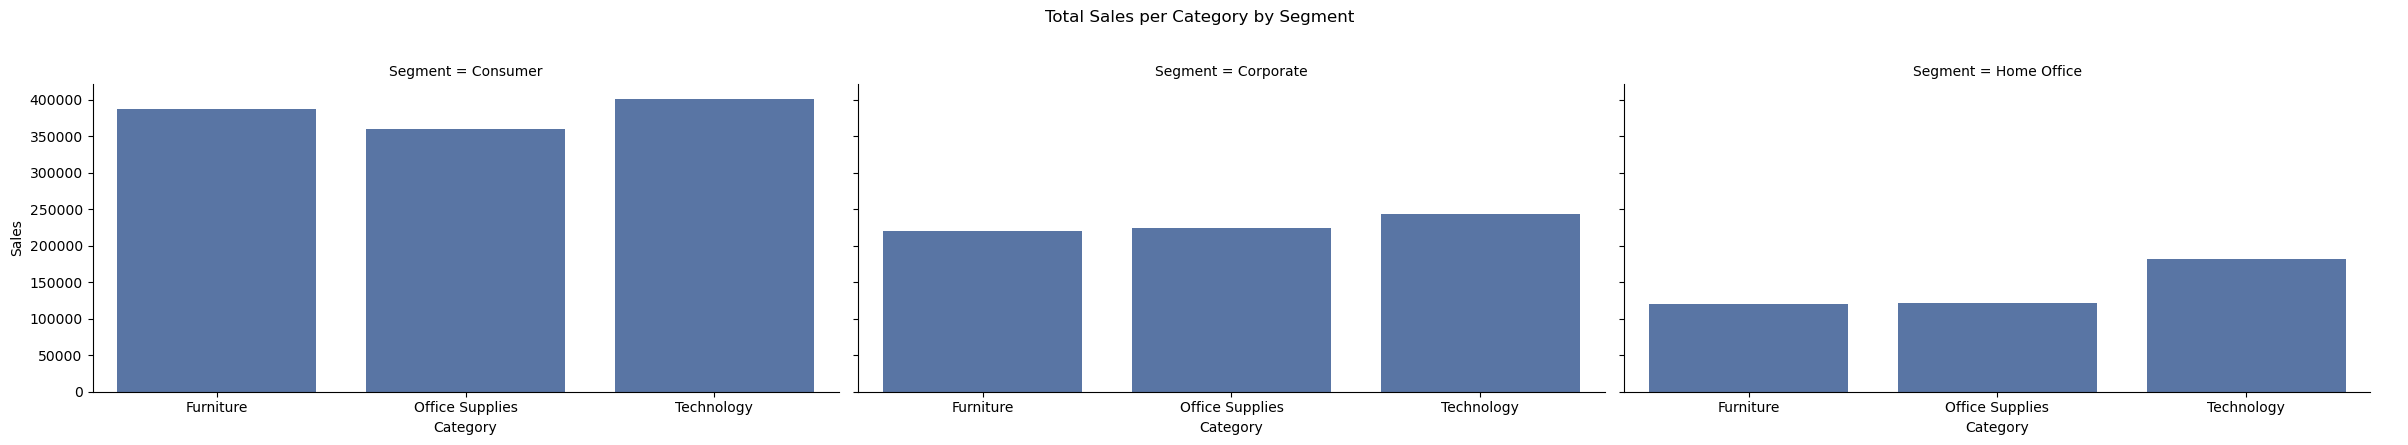

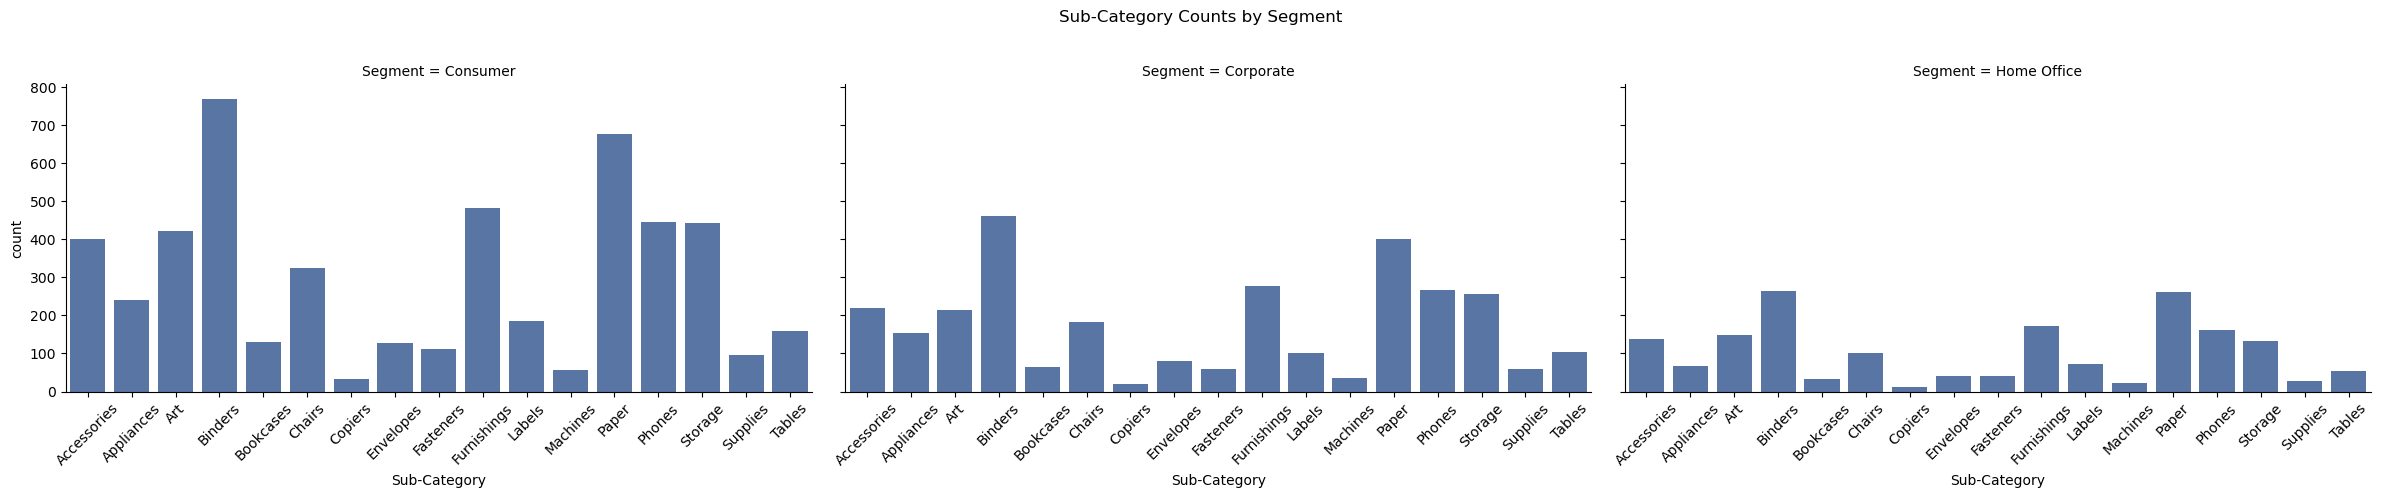

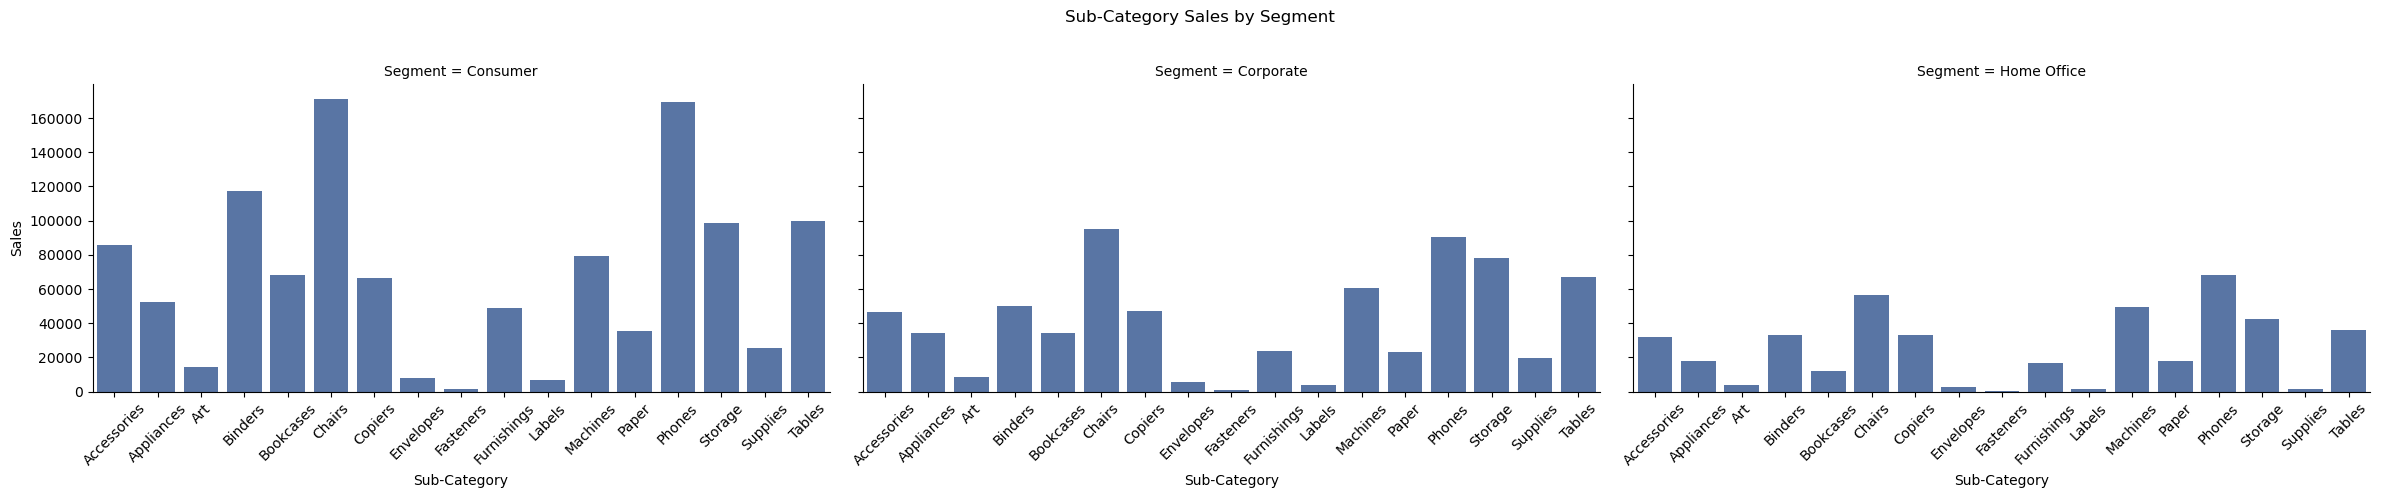

In [20]:
sns.catplot(
    data = df,
    x = 'Category',
    kind = 'count',
    col = 'Segment',
    height=4,
    aspect = 2
)
plt.suptitle("Category Counts by Segment", y = 1.1)
plt.show()

grouped = (
    df.groupby(['Segment', 'Category'], observed=True)['Sales']
      .sum()
      .reset_index()
)

sns.catplot(
    data = grouped,
    x = 'Category',
    y = 'Sales',
    col = 'Segment',
    kind = 'bar',
    height = 4, 
    aspect = 2
)
plt.suptitle("Total Sales per Category by Segment", y = 1.1)
plt.show()

fig1 = sns.catplot(
    data = df,
    x = 'Sub-Category',
    kind = 'count',
    col = 'Segment',
    height = 4,
    aspect = 2
)
fig1.set_xticklabels(rotation = 45)
plt.suptitle("Sub-Category Counts by Segment", y = 1.1)
plt.show()

grouped_sub_cat = (
    df.groupby(['Segment', 'Sub-Category'], observed=True)['Sales']
      .sum()
      .reset_index()
)

fig2 = sns.catplot(
    data=grouped_sub_cat,
    x = 'Sub-Category',
    y = 'Sales',
    kind = 'bar',
    estimator = sum,
    errorbar = None,
    col='Segment',
    height = 4,
    aspect = 2
)

fig2.set_xticklabels(rotation = 45)
plt.suptitle("Sub-Category Sales by Segment", y = 1.1)
plt.show()


### Questions 2: Assessment
The first two sets of plots show that everyone orders office supplies the most, but total amount spent is relatively even for each group accross each category. With the exception of Technology representing a noticeably larger amount of total sales for Home Office customers.

The second set of two plots shows that some sub category items standing out for frequency for each customer. Papers and binders lead amongst all customers for counts. Copiers stand out as making up a large proportion of total sales when they are a very small amount of the counts. This makes sense because the expectation is that copiers are items people don't need as many of relative to paper products, but each copier is significantly more expensive than each paper product.

## Question 3: Does the popularity of products change over time?

In [21]:
quarterly = df.groupby([pd.Grouper(key = 'Order Date', freq = 'QS'), 'Product ID', 'Category'], observed = True).size() #ME for months end produces a lot of tables that are hard to absorb
monthly = quarterly.to_frame(name = 'Count').reset_index()
top10 = (
    monthly
    .sort_values(['Order Date','Count'], ascending = [True,False])
    .groupby('Order Date', observed = True)
    .head(10)
)
#print('\neye break\n')
#print(monthly.info)
#print(len(top10)) #160 is 4 years, 4 quarters, 10 per, 160 entries. 
top_10s = top10['Product ID'].value_counts()   # one row per quarter, so this = #quarters
top_10s = top_10s[top_10s >= 1]
#print(len(top_10s))
#print(sum(top_10s == 3))
#print(top_10s.value_counts())


#for month, group in top10.groupby('Order Date'):
#    print(f"\nTop 10 products for {month.date()}:\n")
#    print(group)

C:\Users\kylew\AppData\Local\Temp\ipykernel_29888\3213472813.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  .pivot_table(


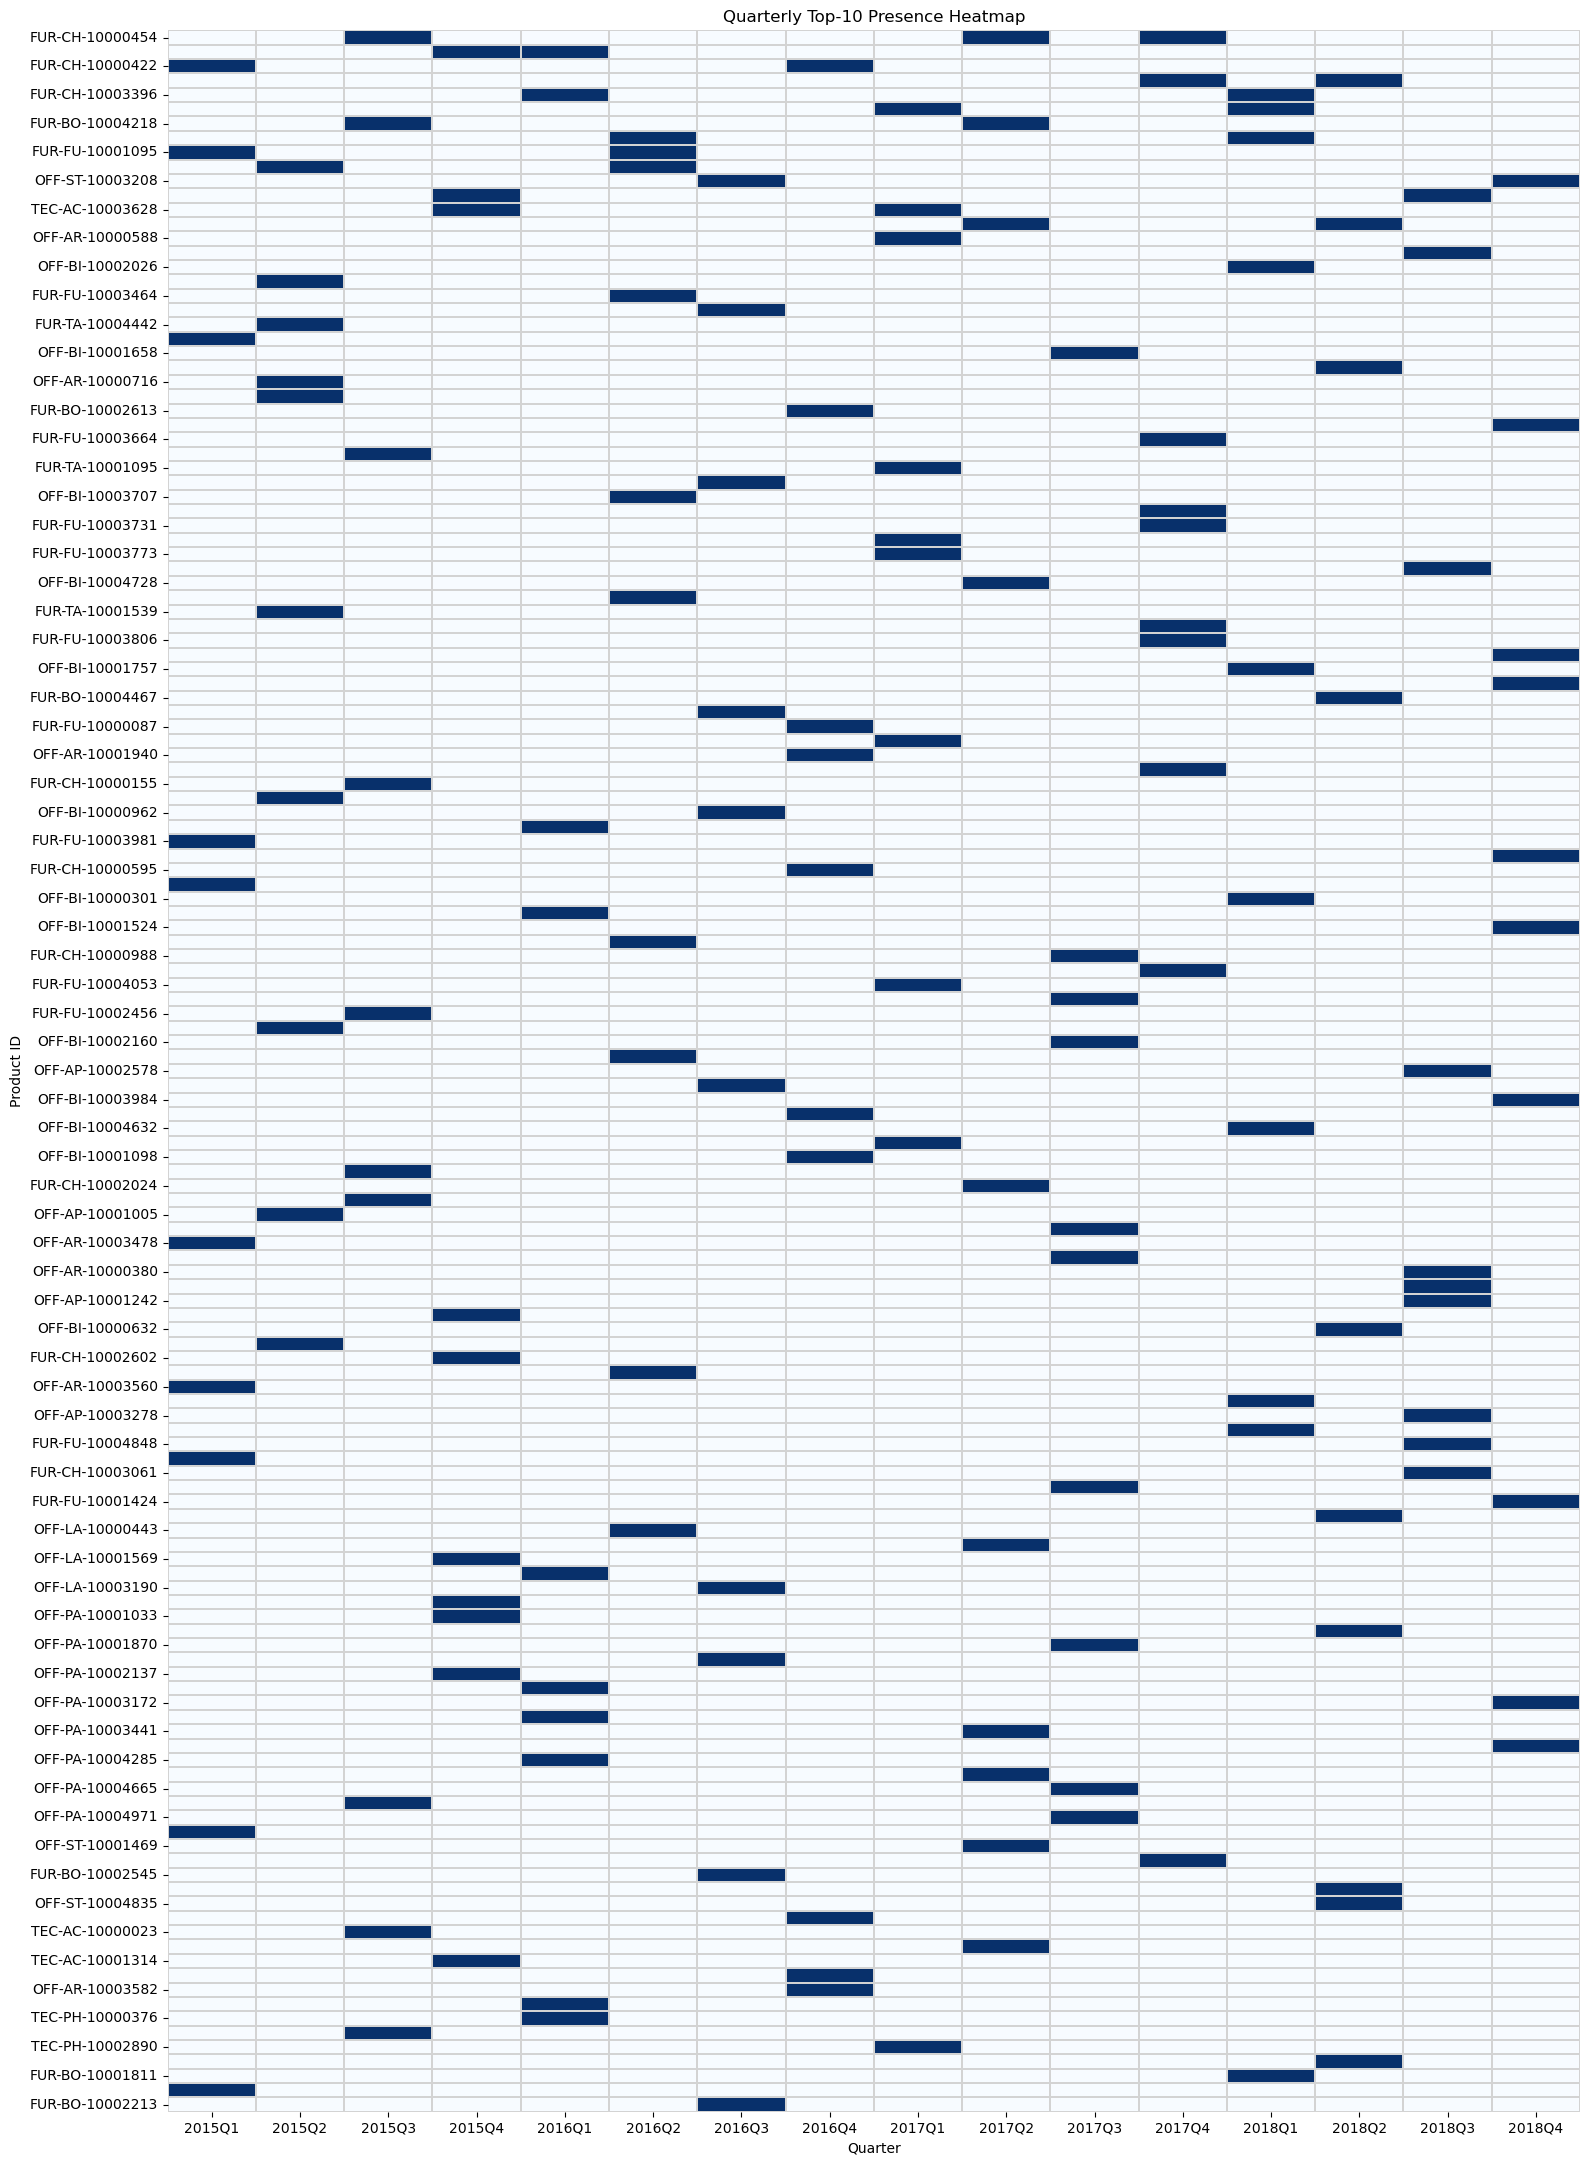

Category    Furniture  Office Supplies  Technology
Order Date                                        
2015-01-01          6                4           0
2015-04-01          7                3           0
2015-07-01          5                3           2
2015-10-01          2                6           2
2016-01-01          3                6           1
2016-04-01          8                2           0
2016-07-01          5                5           0
2016-10-01          5                4           1
2017-01-01          6                2           2
2017-04-01          3                5           2
2017-07-01          3                7           0
2017-10-01          8                2           0
2018-01-01          5                5           0
2018-04-01          4                5           1
2018-07-01          4                6           0
2018-10-01          1                9           0


In [22]:
presence = ( #don't use pivot tables for tidy data, okay for plotting
    top10.assign(in_top10 = 1)
         .pivot_table(
             index = 'Product ID',
             columns = 'Order Date',
             values = 'in_top10',
             fill_value = 0
         )
)
presence = presence.loc[top_10s.index]
presence.columns = presence.columns.to_period('Q').astype(str)
#print(presence)

plt.figure(figsize=(16, 0.15 * presence.shape[0]))  # scales to # of products
sns.heatmap(
    presence,
    cmap = "Blues",
    linewidths = 0.3,
    linecolor = 'lightgray',
    cbar = False
)
plt.title("Quarterly Top-10 Presence Heatmap")
plt.xlabel("Quarter")
plt.ylabel("Product ID")
plt.tight_layout()
plt.show()

category_by_period = (
    top10.groupby('Order Date')['Category']
         .value_counts()
         .unstack(fill_value = 0)
)

print(category_by_period)

### Questions 3: Assessment

The visual inspection of the data appears to be completely random. I cannot discern any visual trends that would indicate why one product would be more popular than another. The category list shows that technology is infrequencly the category for the most popular items and has 9 quarters with no items in the top 10. The category summary also shows that furniture and office supplies radnomly flip flop on what is the most popular.  

# Customer Behavior
1. How does customer segment impact ordering habits? (Sales, number of order)
1. How many orders are from repeat customers -> do some additional statistics on this how many orders do the customers make, are the values of the orders consistent? Bin customers by number of orders and see if they spend different amounts per transaction?
1. What is the revenue breakdown? (One time customer vs repeat)
1. What is the average time it takes for a customer to reorder?
1. Is total spend indicative of more orders or just higher value orders?
1. How does Ship Mode relate to order price and customer segment?
1. How do seasonal sales trends vary across Regions, and Segments?

## Question 1: How does customer segment impact ordering habits? (Sales, number of orders)

In [23]:
#Question 1
#total sales by segment
sales_by_segment = df.groupby('Segment', observed = True)['Sales'].sum().sort_values(ascending=False)
print(sales_by_segment)
#number of orders by segment
orders_by_segment =  df.groupby('Segment', observed = True)['Order ID'].nunique()
print(orders_by_segment)
#Customers per segment
customers_per_segment = df.groupby('Segment', observed = True)['Customer ID'].nunique()
print(customers_per_segment)
#average order by segment
average_orders_per_segment = df.groupby('Segment', observed = True)['Sales'].sum().sort_values(ascending=False)/df.groupby('Segment', observed = True)['Order ID'].nunique()
print(average_orders_per_segment)
#how many orders per member of segment
avg_segment_member_orders = (df.groupby(['Segment', 'Customer ID'], observed=True)['Order ID'].nunique().reset_index(name = 'OrdersPerCustomer'))
print(avg_segment_member_orders)

Segment
Consumer       1.148061e+06
Corporate      6.884941e+05
Home Office    4.249822e+05
Name: Sales, dtype: float64
Segment
Consumer       2537
Corporate      1491
Home Office     894
Name: Order ID, dtype: int64
Segment
Consumer       409
Corporate      236
Home Office    148
Name: Customer ID, dtype: int64
Segment
Consumer       452.526816
Corporate      461.766650
Home Office    475.371563
dtype: float64
         Segment Customer ID  OrdersPerCustomer
0       Consumer    AA-10315                  5
1       Consumer    AA-10375                  9
2       Consumer    AA-10480                  4
3       Consumer    AA-10645                  6
4       Consumer    AB-10015                  3
..           ...         ...                ...
788  Home Office    TW-21025                  7
789  Home Office    VF-21715                  5
790  Home Office    VM-21685                  7
791  Home Office    VP-21730                  3
792  Home Office    VT-21700                  2

[793 row

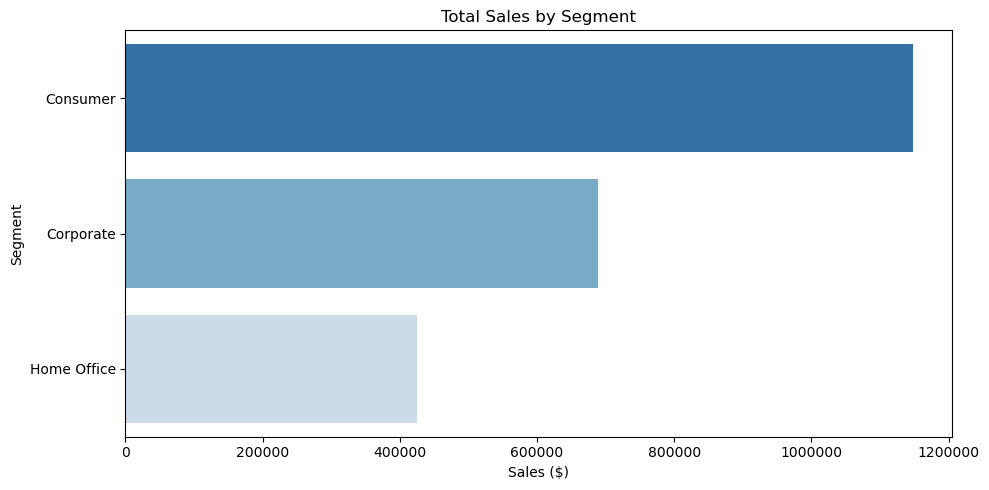

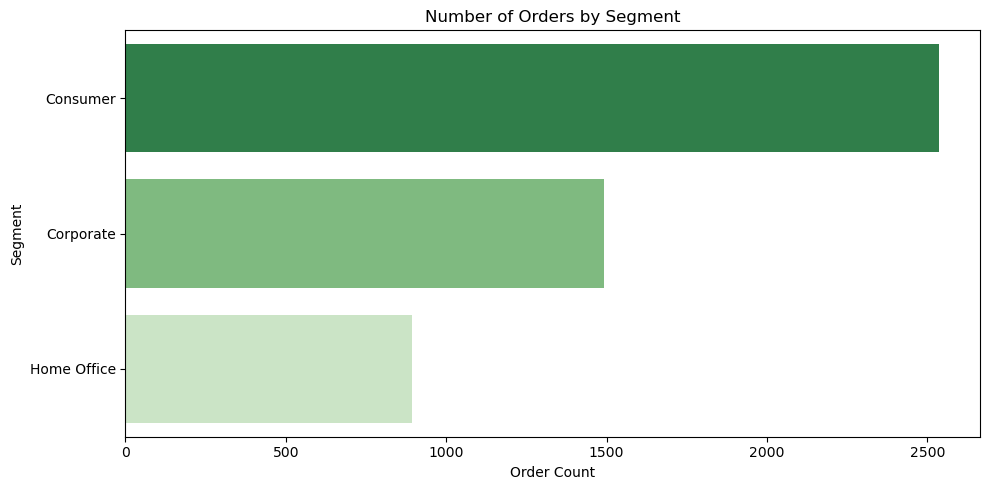

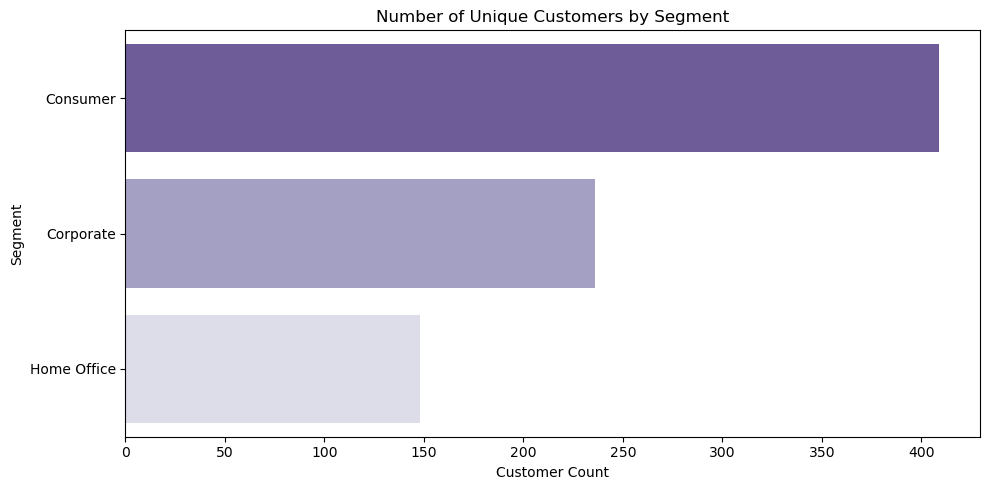

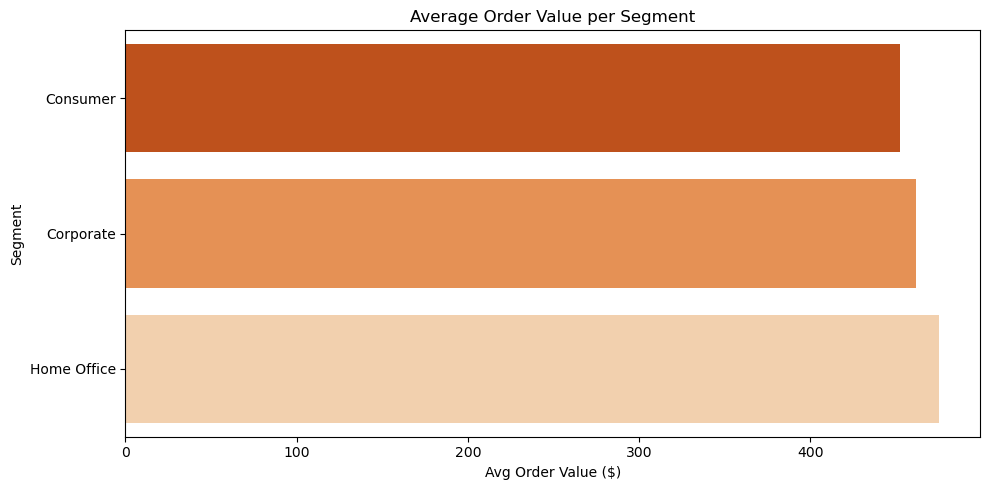

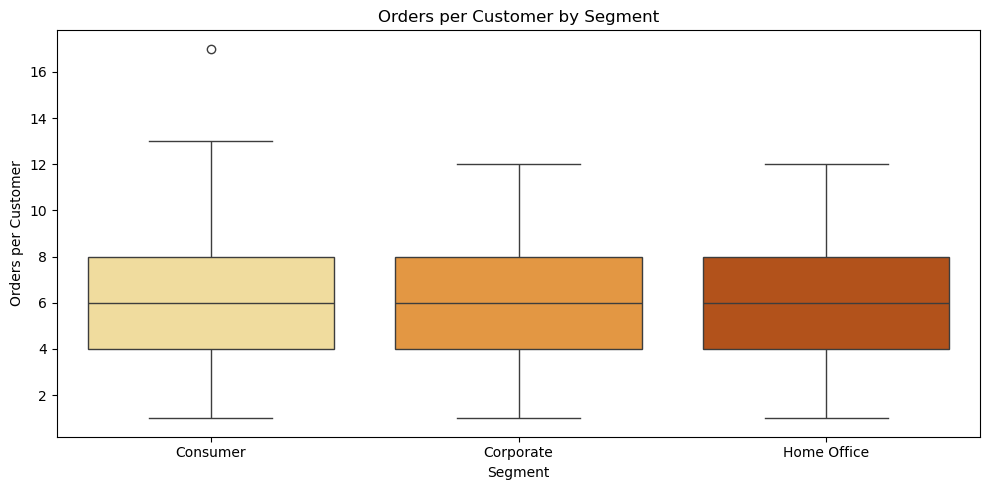

In [24]:
#total sales by segment
plt.figure(figsize=(10,5))
sns.barplot(
    x = sales_by_segment.values,
    y = sales_by_segment.index,
    hue = sales_by_segment.index,
    palette = "Blues_r",
    legend = False
)
plt.title("Total Sales by Segment")
plt.xlabel("Sales ($)")
plt.ylabel("Segment")
plt.gca().ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()


#number of orders by segment
plt.figure(figsize=(10,5))
sns.barplot(
    x = orders_by_segment.values,
    y = orders_by_segment.index,
    hue = orders_by_segment.index,
    palette = "Greens_r",
    legend = False
)
plt.title("Number of Orders by Segment")
plt.xlabel("Order Count")
plt.ylabel("Segment")
plt.gca().ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()


#Customers per segment
plt.figure(figsize=(10,5))
sns.barplot(
    x = customers_per_segment.values,
    y = customers_per_segment.index,
    hue = customers_per_segment.index,
    palette = "Purples_r",
    legend = False
)
plt.title("Number of Unique Customers by Segment")
plt.xlabel("Customer Count")
plt.ylabel("Segment")
plt.gca().ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()


#average order by segment
plt.figure(figsize=(10,5))
sns.barplot(
    x = average_orders_per_segment.values,
    y = average_orders_per_segment.index,
    hue = average_orders_per_segment.index,
    palette = "Oranges_r",
    legend = False
)
plt.title("Average Order Value per Segment")
plt.xlabel("Avg Order Value ($)")
plt.ylabel("Segment")
plt.gca().ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()


#how many orders per member of segment
plt.figure(figsize = (10,5))
sns.boxplot(
    data = avg_segment_member_orders,
    x = 'Segment',
    y = 'OrdersPerCustomer',
    hue='Segment', 
    palette = 'YlOrBr',
    legend = False
)
plt.title("Orders per Customer by Segment")
plt.xlabel("Segment")
plt.ylabel("Orders per Customer")
plt.tight_layout()
plt.show()

### Question 1: Analysis
Due to each segment having approximately the same average order price, and the same number of orders per customer the plots for Total Sale by Segment, Number of Orders by Segment, Number of Unique Customers Per Segment all come out looking very close to the same. I think it still takes seeing all of the plots to understand why it is happening but once I see them all it clear why it happens.

## Question 2: How many orders are from repeat customers -> do some additional statistics on this how many orders do the customers make, are the values of the orders consistent? Bin customers by number of orders and see if they spend different amounts per transaction?

In [25]:
#Question 2
#print(df.groupby('Customer ID', observed = True)['Order ID'].nunique().sort_values(ascending = False)) #sum this when the number of orders is greater than 1 to get total transactions.
customer_order_data = df.groupby('Customer ID', observed = True)['Order ID'].nunique().sort_values(ascending = False).to_frame('Number of Orders')
#print(customer_order_data)
sales_per_customer = df.groupby('Customer ID', observed = True)['Sales'].sum()
customer_order_data['Total Sales'] = sales_per_customer #will add new column joined by the index which is customer ID
customer_order_data['Average Transaction Total'] = customer_order_data['Total Sales'] / customer_order_data['Number of Orders']
#print(customer_order_data)
customer_order_data['Segment'] = df.groupby('Customer ID', observed = True)['Segment'].first()

customer_per_order = (df.groupby(['Customer ID', 'Order ID'], observed=True)['Sales'].sum().rename('Order Value').reset_index())
order_stats = (
             customer_per_order.groupby('Customer ID', observed = True)['Order Value']
             .agg(
                 Avg_Order_Value = 'mean',
                 Order_Value_SD  = 'std',   # standard deviation
                 Min_Order_Value = 'min',
                 Max_Order_Value = 'max',
             )
)
#print(order_stats.loc['AA-10315'])
#print(customer_order_data.loc['AA-10315'])

customer_order_data = customer_order_data.join(order_stats, how='left')
print(customer_order_data)

ids_to_verify = customer_order_data.index[:5].append(customer_order_data.index[-5:])
#print(ids_to_verify)
verified_sales = (df[df['Customer ID'].isin(ids_to_verify)].groupby('Customer ID', observed = True)['Sales'].sum().rename("True Total Sales")).to_frame('Total Sales')
verified_sales['check_sales'] = customer_order_data['Total Sales']
#print(verified_sales) #checks out that total sales for customers matches in both data frames.

             Number of Orders  Total Sales  Average Transaction Total  \
Customer ID                                                             
EP-13915                   17    5478.0608                 322.238871   
ZC-21910                   13    8025.7070                 617.362077   
CK-12205                   13    3154.8550                 242.681154   
JE-15745                   13    6760.8150                 520.062692   
PG-18820                   13    3086.9070                 237.454385   
...                       ...          ...                        ...   
SM-20905                    1    1043.0410                1043.041000   
AR-10570                    1      88.1500                  88.150000   
SC-20845                    1      14.1120                  14.112000   
LD-16855                    1       5.3040                   5.304000   
TC-21145                    1    1038.2600                1038.260000   

               Segment  Avg_Order_Value  Order_Val

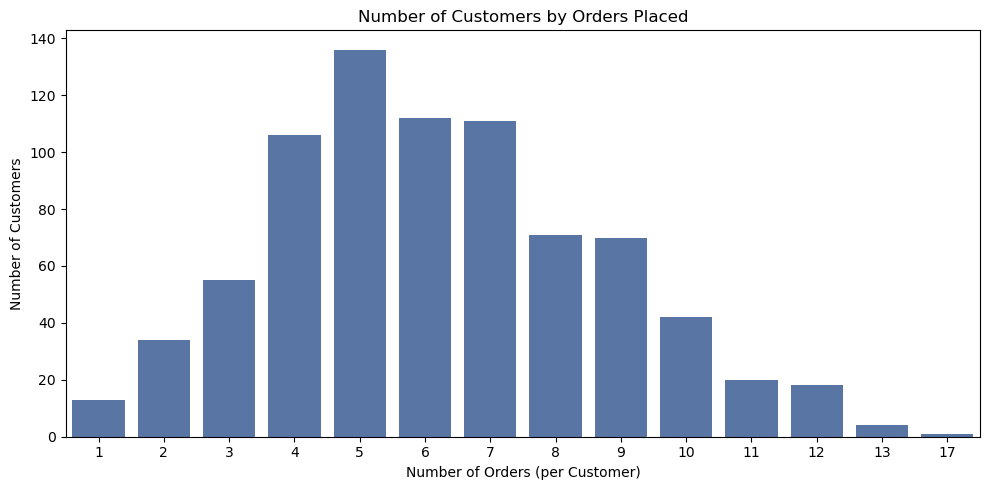

Number of Orders
1      13
2      34
3      55
4     106
5     136
6     112
7     111
8      71
9      70
10     42
11     20
12     18
13      4
17      1
Name: count, dtype: int64


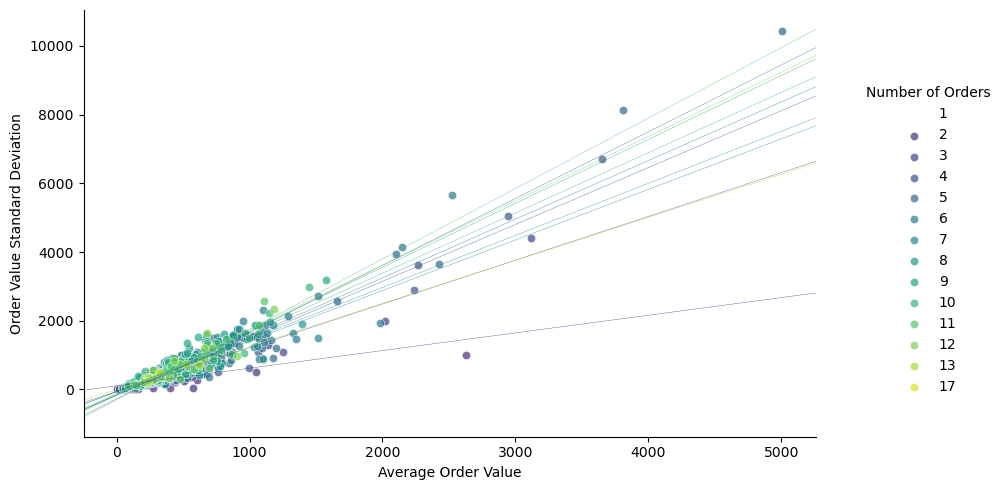

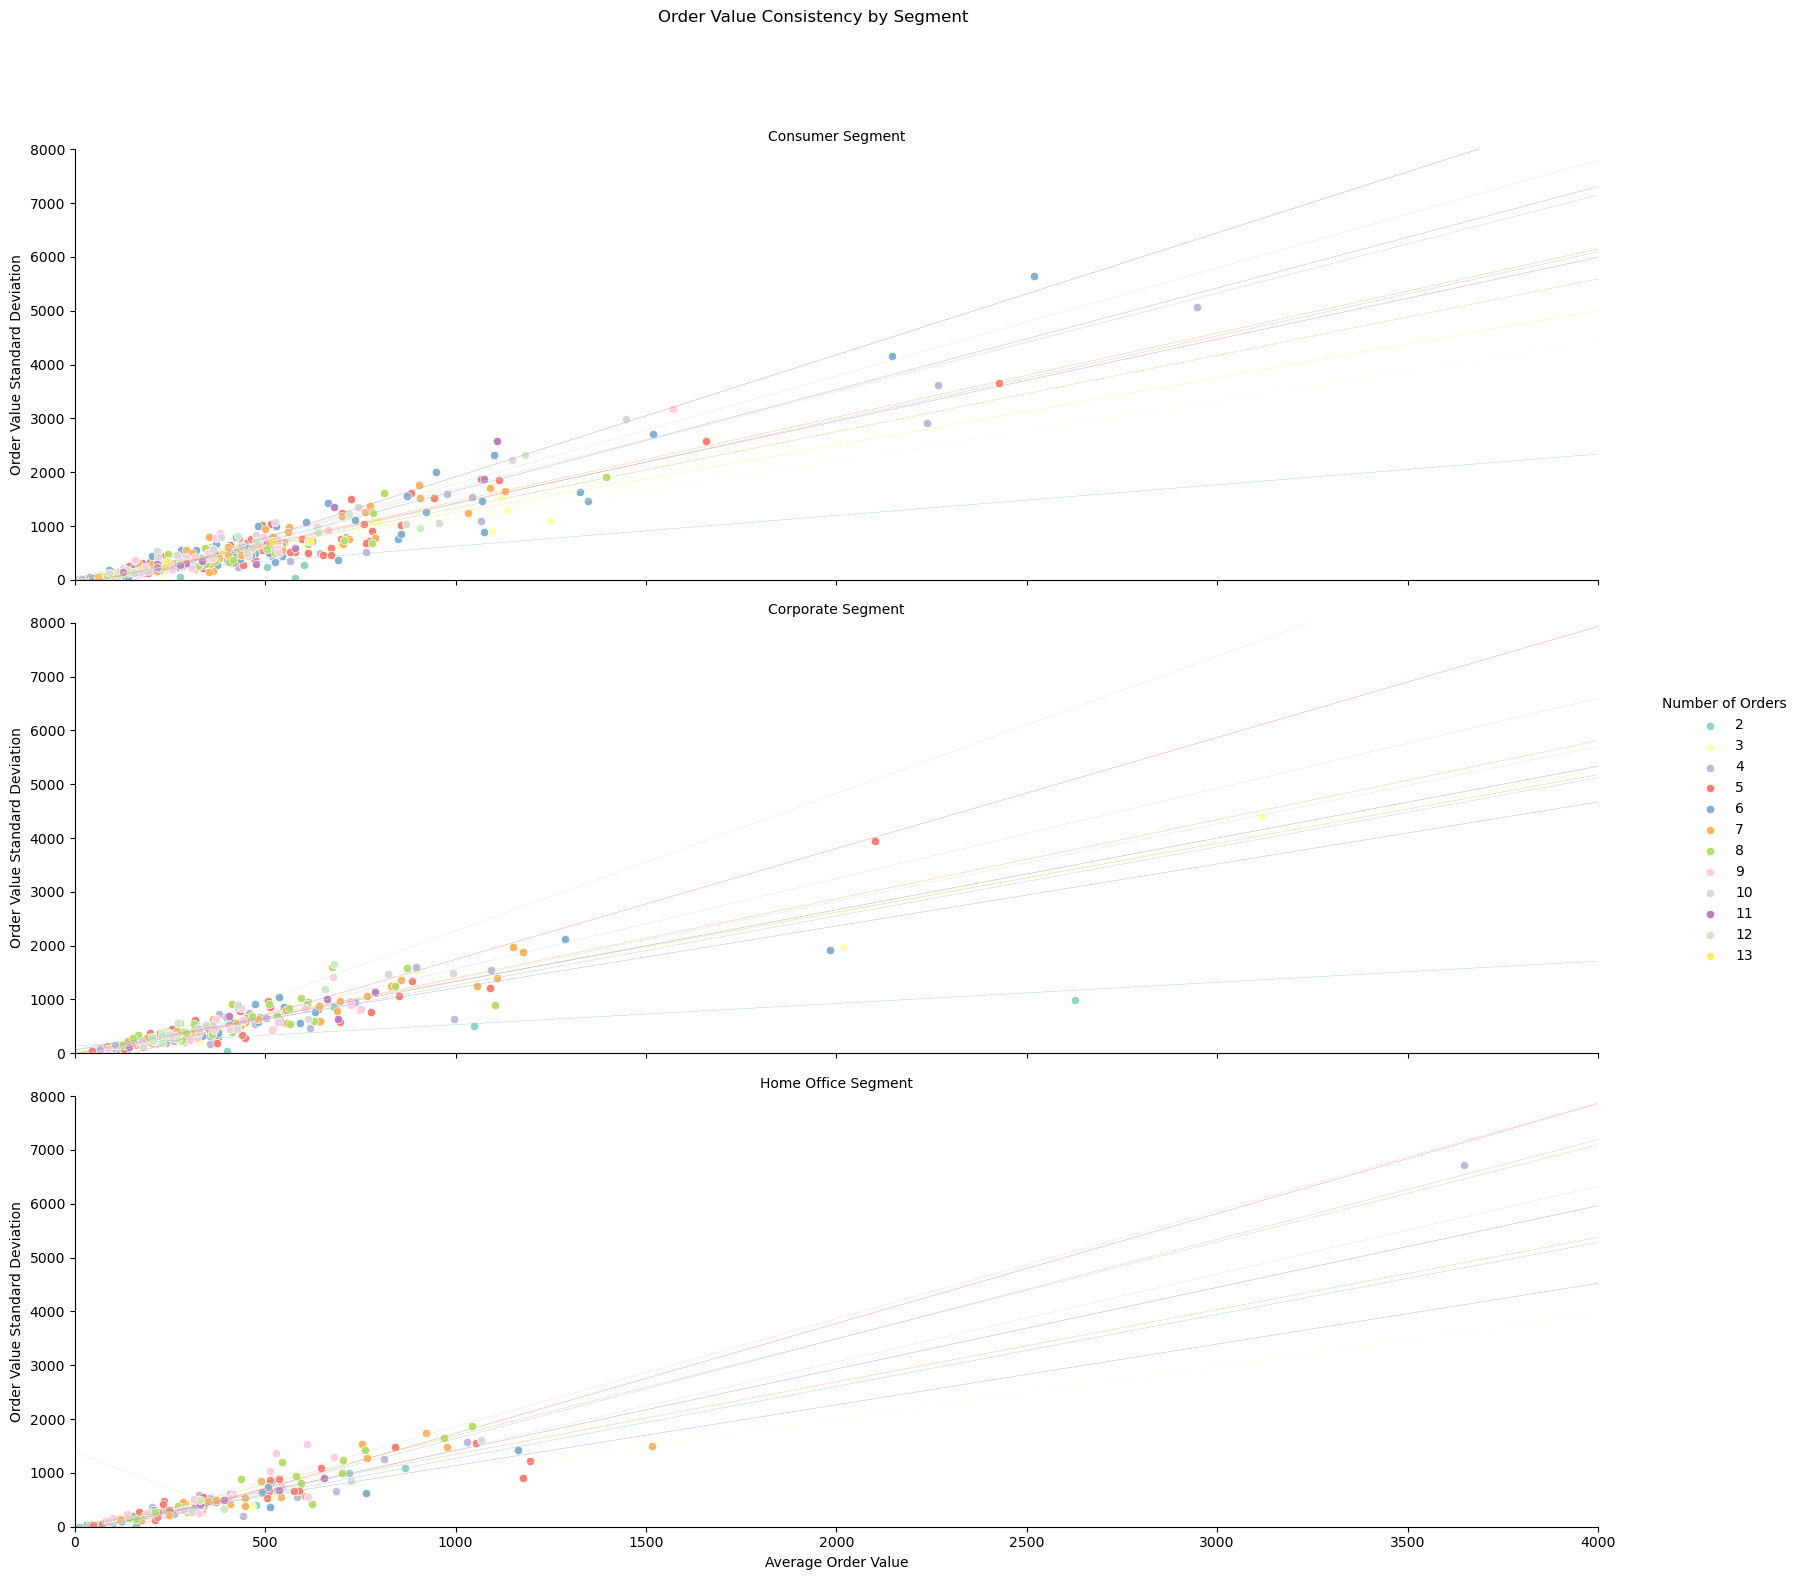

In [26]:
plt.figure(figsize=(10,5))
order_distribution = customer_order_data['Number of Orders'].value_counts()
sns.barplot(x = order_distribution.index, y = order_distribution.values)
plt.title("Number of Customers by Orders Placed")
plt.xlabel("Number of Orders (per Customer)")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

print(order_distribution.sort_index())

#all data on one plot

def regline(data, color, **kwargs):
    clean = data[['Avg_Order_Value', 'Order_Value_SD']].dropna()

    if len(clean) < 2 or clean['Avg_Order_Value'].nunique() < 2:
        return  #exit the function if less than 2 data points
    
    sns.regplot(
        data=clean,
        x='Avg_Order_Value',
        y='Order_Value_SD',
        scatter=False,
        ci=None,
        color=color,     # <-- use the facet's assigned viridis color
        line_kws={'linewidth': 0.25},
        truncate = False
    )


order_stats_plot = (
    order_stats
      .join(customer_order_data[['Number of Orders', 'Segment']])  # add metadata
      .reset_index()                                               # bring Customer ID out if you want it
)

g = sns.FacetGrid(
    order_stats_plot,
    height=5,
    aspect=1.4,
    hue='Number of Orders',    # color by number of orders
    palette='viridis'          # or 'tab20' for more distinct colors
)

g.map_dataframe(
    sns.scatterplot,
    x='Avg_Order_Value',
    y='Order_Value_SD',
    alpha=0.7
)

g.map_dataframe(regline)

g.add_legend(title="Number of Orders")
g._legend.set_bbox_to_anchor((1.2, 0.5))
g.set_axis_labels("Average Order Value", "Order Value Standard Deviation")
g.set_titles("{col_name} Segment")

plt.tight_layout()
plt.show()

plot_df = customer_order_data[ #kick out non repeat customers, orders = 1, and points with count <2 because you can't get standard deviation
    (customer_order_data['Number of Orders'] != 1) &
    (customer_order_data['Number of Orders'] != 17) #if more edge cases existed this should be done programatically
]

#separating by segment

fig = sns.FacetGrid(#make alpha more translucent and break up by segmnent
    plot_df,
    col='Segment',
    height=5,
    aspect = 3,
    sharex=True, #keep plot limits identical
    sharey=True, #keep plot limits identical
    ylim = (0, 8000),
    xlim = (0, 4000),
    hue='Number of Orders', 
    palette='Set3',
    col_wrap = 1
)

fig.map_dataframe(
    sns.scatterplot,
    x='Avg_Order_Value',
    y='Order_Value_SD',
    alpha=1
)



fig.map_dataframe(regline)

for ax in fig.axes.flatten():
    ax.set_xlabel("Average Order Value")
    ax.set_ylabel("Order Value Standard Deviation")

#fig.map_dataframe( # regression lines, only produced a single line for each set. Movings towards a line for each type of customer
#    sns.regplot,
#    x='Avg_Order_Value',
#    y='Order_Value_SD',
#    scatter=False,          # don't redraw points
#    palette='viridis',          # simple consistent line color
#    line_kws={'linewidth': .25},
#    ci = None
#)


    
fig.set_titles("{col_name} Segment")
fig.fig.suptitle("Order Value Consistency by Segment", y=1.05)

fig.add_legend()
fig._legend.set_bbox_to_anchor((1.1, 0.5))


plt.tight_layout()
plt.show()


### Question 2: Analysis
The divergence of the regression lines for the average order value grouped by number of orders made does not appear to show any trends between groups based on number of orders. If 3 orders or 5 orders are made it appears the consistency is different.
The divergence of the regression lines for the average order value by category and the standard deviations implies that within each category customers that make different numbers of purchases are behaving differently. I.e. if you make 3 purchases your trends are different from someone who made 5 purchases.

## Question 3: What is the revenue breakdown? (One time customer vs repeat)

In [27]:

#Question 3 
print(df.groupby('Customer ID', observed = True).agg(
    Orders=('Order ID', 'nunique'),
    TotalSales=('Sales', 'sum')
).sort_values('Orders', ascending=False)) #793 rows aligns with the 793 customers from the exploratory stage

customer_sales = df.groupby('Customer ID', observed = True).agg(
    Orders=('Order ID', 'nunique'),
    TotalSales=('Sales', 'sum')
).sort_values('Orders', ascending=False)

sales_by_order_count = customer_sales.groupby('Orders')['TotalSales'].sum().sort_index()
print(sales_by_order_count/sales_by_order_count.sum())

             Orders  TotalSales
Customer ID                    
EP-13915         17   5478.0608
ZC-21910         13   8025.7070
CK-12205         13   3154.8550
JE-15745         13   6760.8150
PG-18820         13   3086.9070
...             ...         ...
SM-20905          1   1043.0410
AR-10570          1     88.1500
SC-20845          1     14.1120
LD-16855          1      5.3040
TC-21145          1   1038.2600

[793 rows x 2 columns]
Orders
1     0.002291
2     0.011624
3     0.031587
4     0.084991
5     0.153052
6     0.143305
7     0.159764
8     0.115307
9     0.109569
10    0.084249
11    0.048548
12    0.043994
13    0.009298
17    0.002422
Name: TotalSales, dtype: float64


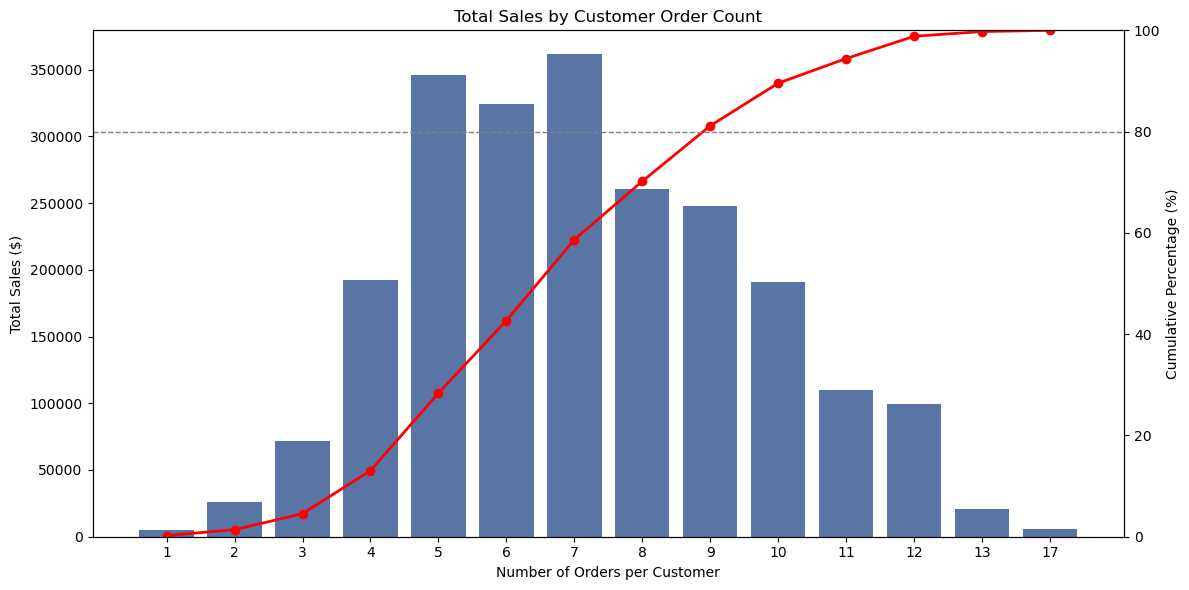

In [28]:
plt.figure(figsize=(12,6))

#distribution
cumulative_pct = sales_by_order_count.cumsum() / sales_by_order_count.sum() * 100
ax = sns.barplot(
    x = sales_by_order_count.index.astype(str),
    y = sales_by_order_count.values
)

ax.set_xlabel("Number of Orders per Customer")
ax.set_ylabel("Total Sales ($)")

#CDF line
ax2 = ax.twinx()
ax2.set_ylim(0, 100)
ax2.plot(
    sales_by_order_count.index.astype(str),
    cumulative_pct.values,
    color="red",
    marker="o",
    linewidth = 2
)

ax2.set_ylabel("Cumulative Percentage (%)")

ax2.axhline(80, color='gray', linestyle='--', linewidth=1) #shows where you've reached the bottom 80% of customer behavior

plt.title("Total Sales by Customer Order Count")
plt.tight_layout()
plt.show()

### Question 3: Analysis
The vast majority of revenue comes from repeat customers, approximately 99.75%. This is indicative of strong customer retention and providing a variety of products that customers purchase over time.

In [29]:

#question 4

customer_sales = df.groupby('Customer ID', observed = True).agg(
    Orders=('Order ID', 'nunique'),
    TotalSales=('Sales', 'sum')
).sort_values('Orders', ascending=False)

customer_sales['Percent Of Total'] = customer_sales['TotalSales'] / df['Sales'].sum()
customer_sales = customer_sales.sort_values('Percent Of Total', ascending = False) #sort by who makes up the highest portion of total sales.
print(customer_sales)
print(customer_sales['Percent Of Total'].sum()) #sums to .9 repeating, effectively 1.


             Orders  TotalSales  Percent Of Total
Customer ID                                      
SM-20320          5   25043.050          0.011073
TC-20980          5   19052.218          0.008424
RB-19360          6   15117.339          0.006685
TA-21385          4   14595.620          0.006454
AB-10105         10   14473.571          0.006400
...             ...         ...               ...
MG-18205          1      16.739          0.000007
CJ-11875          1      16.520          0.000007
SC-20845          1      14.112          0.000006
LD-16855          1       5.304          0.000002
TS-21085          2       4.833          0.000002

[793 rows x 3 columns]
0.9999999999999998


### Question 4: Analysis

## Question 5: What is the average time it takes for a customer to reorder?

In [30]:
#Question 5
print('\nQuestion 5\n')
customer_orders = df[['Customer ID','Order ID','Order Date', 'Segment']].drop_duplicates(subset=['Customer ID', 'Order ID']).sort_values(['Customer ID','Order Date'])
customer_orders['Delay'] = customer_orders.groupby('Customer ID', observed = True)['Order Date'].diff().dt.days
print(customer_orders)
print(customer_orders.groupby('Segment', observed = True)['Delay'].describe())


Question 5

     Customer ID        Order ID Order Date   Segment  Delay
2229    AA-10315  CA-2015-128055 2015-03-31  Consumer    NaN
7468    AA-10315  CA-2015-138100 2015-09-15  Consumer  168.0
1299    AA-10315  CA-2016-121391 2016-10-04  Consumer  385.0
5198    AA-10315  CA-2017-103982 2017-03-03  Consumer  150.0
1159    AA-10315  CA-2018-147039 2018-06-29  Consumer  483.0
...          ...             ...        ...       ...    ...
18      ZD-21925  CA-2015-143336 2015-08-27  Consumer    NaN
5897    ZD-21925  CA-2017-167682 2017-04-03  Consumer  585.0
3040    ZD-21925  US-2017-147991 2017-05-05  Consumer   32.0
3814    ZD-21925  CA-2017-152471 2017-07-08  Consumer   64.0
8341    ZD-21925  CA-2018-141481 2018-06-11  Consumer  338.0

[4922 rows x 5 columns]
              count        mean         std  min    25%    50%     75%     max
Segment                                                                       
Consumer     2128.0  192.767387  190.136780  0.0  53.00  132.0  273.00  

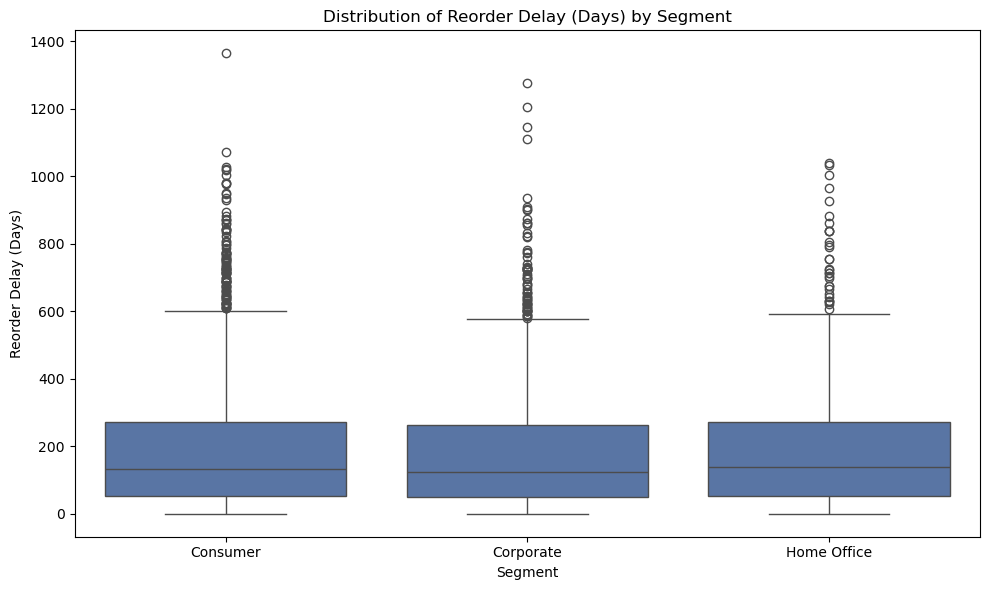

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=customer_orders,
    x='Segment',
    y='Delay'
)

plt.title("Distribution of Reorder Delay (Days) by Segment")
plt.ylabel("Reorder Delay (Days)")
plt.xlabel("Segment")
plt.tight_layout()
plt.show()

### Question 5: Analysis
All segments have a relatively even box plot. Consumers have the farthest outlier and home office have the fewest outliers (with the assumption that there aren't a lot of dates stacked directly on top of eachother). Visually it looks like consumers also have more on the long end of the tail, but a deeper analysis of this counting the exact values would prove that definitively. The weakness of this data analysis method is that if a customer purchased something and then made a second purchase nearly immediately and never came back this plot skews downward.

## Question 6: Is total spend indicative of more orders or just higher value orders?

In [32]:
customer_sales['AvgOrderValue'] = customer_sales['TotalSales'] / customer_sales['Orders']

customer_sales_filtered = customer_sales[
    (customer_sales['Orders'] != 1) &
    (customer_sales['Orders'] != 17)
].copy()

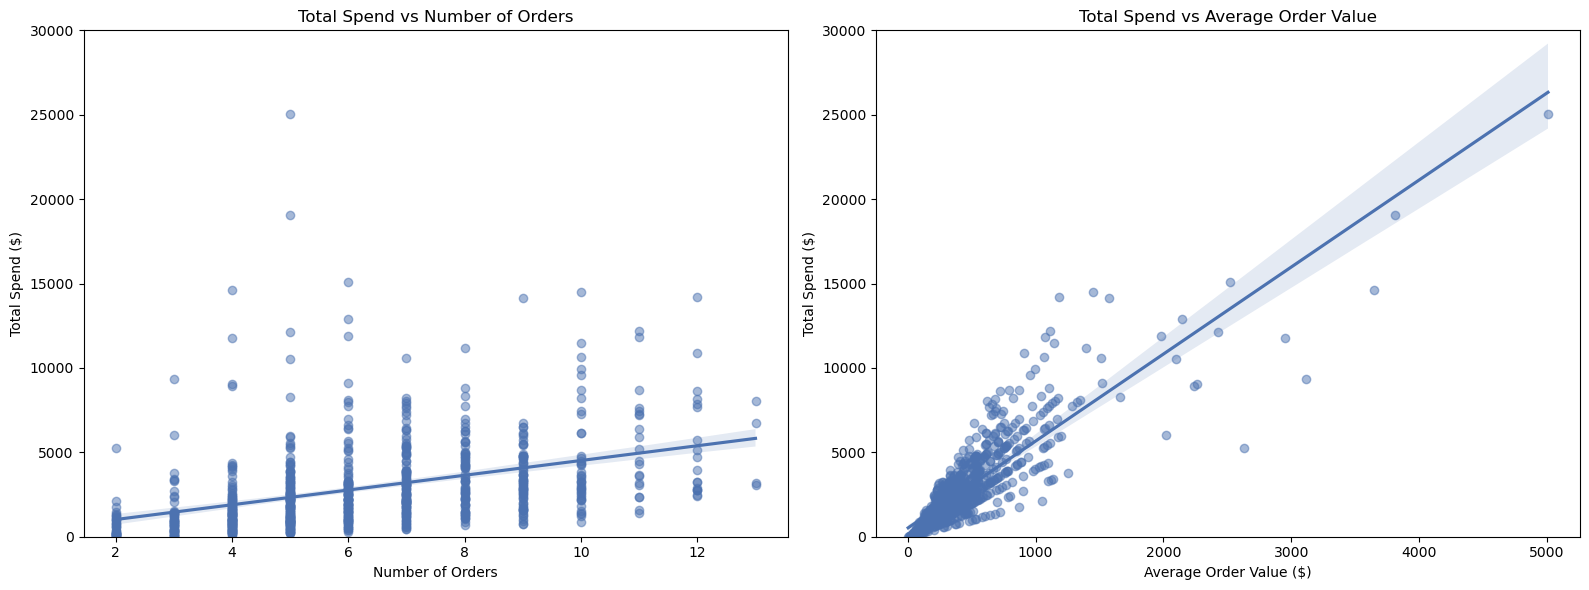

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))

sns.regplot(
    data = customer_sales_filtered,
    x = 'Orders',
    y = 'TotalSales',
    ax = axes[0],
    scatter_kws = {'alpha':0.5},
)

axes[0].set_title("Total Spend vs Number of Orders")
axes[0].set_xlabel("Number of Orders")
axes[0].set_ylabel("Total Spend ($)")
axes[0].set_ylim(0, 30000)


sns.regplot(
    data = customer_sales_filtered,
    x = 'AvgOrderValue',
    y = 'TotalSales',
    ax = axes[1],
    scatter_kws = {'alpha':0.5}
)
axes[1].set_title("Total Spend vs Average Order Value")
axes[1].set_xlabel("Average Order Value ($)")
axes[1].set_ylabel("Total Spend ($)")
axes[1].set_ylim(0, 30000)
plt.tight_layout()
plt.show()

### Question 6: Analysis
Do to the total spend vs number of orders plot having a large spread in total spend at each number of orders. This means that customers that place the same number of orders can spend widely different amounts. By contrast on the right as average order value increase the amount of total spend increases. These things combined show that total spend is not indicative of more orders, instead just that the orders have a higher average order value. 

## Question 7: How does Ship Mode relate to order price and customer segment?

In [34]:
order_prices = (
    df.groupby(['Order ID', 'Ship Mode', 'Segment'], observed=True)['Sales']
      .sum()
      .reset_index(name='OrderTotal')
)

print(order_prices)

shipmode_segment_stats = (
    order_prices
        .groupby(['Ship Mode', 'Segment'], observed=True)['OrderTotal']
        .agg(
            Min_OrderTotal='min',
            Max_OrderTotal='max',
            Mean_OrderTotal='mean',
            SD_OrderTotal='std',
            Count='count'
        )
        .reset_index()
)
print(shipmode_segment_stats)

            Order ID       Ship Mode      Segment  OrderTotal
0     CA-2015-100006  Standard Class     Consumer     377.970
1     CA-2015-100090  Standard Class    Corporate     699.192
2     CA-2015-100293  Standard Class  Home Office      91.056
3     CA-2015-100328  Standard Class     Consumer       3.928
4     CA-2015-100363  Standard Class    Corporate      21.376
...              ...             ...          ...         ...
4917  US-2018-168802  Standard Class    Corporate      18.368
4918  US-2018-169320    Second Class     Consumer     171.430
4919  US-2018-169488     First Class     Consumer      56.860
4920  US-2018-169502  Standard Class  Home Office     113.410
4921  US-2018-169551     First Class     Consumer    1344.838

[4922 rows x 4 columns]
         Ship Mode      Segment  Min_OrderTotal  Max_OrderTotal  \
0      First Class     Consumer           1.392       14052.480   
1      First Class    Corporate           2.502        5282.648   
2      First Class  Home Offic

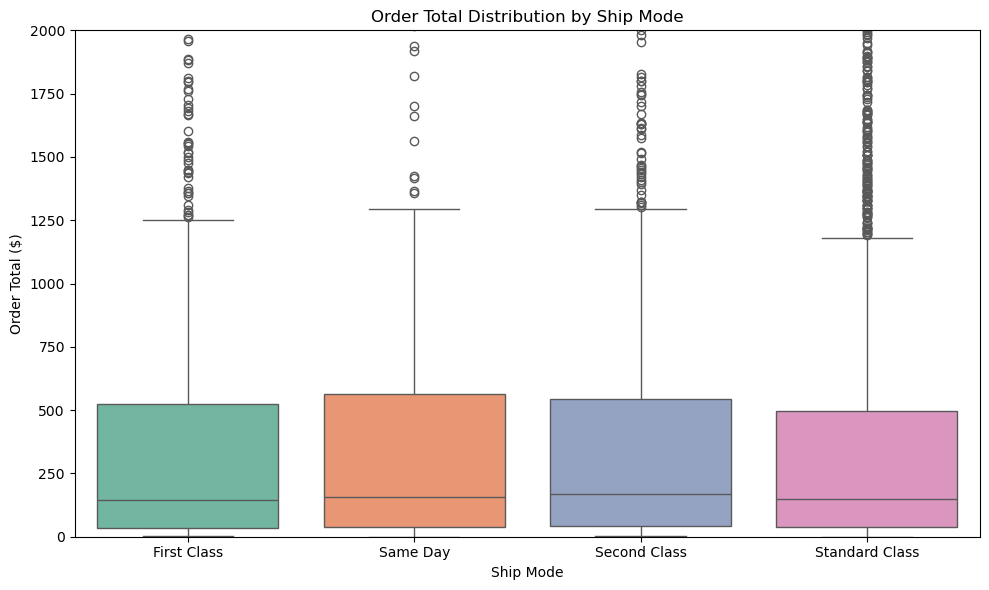

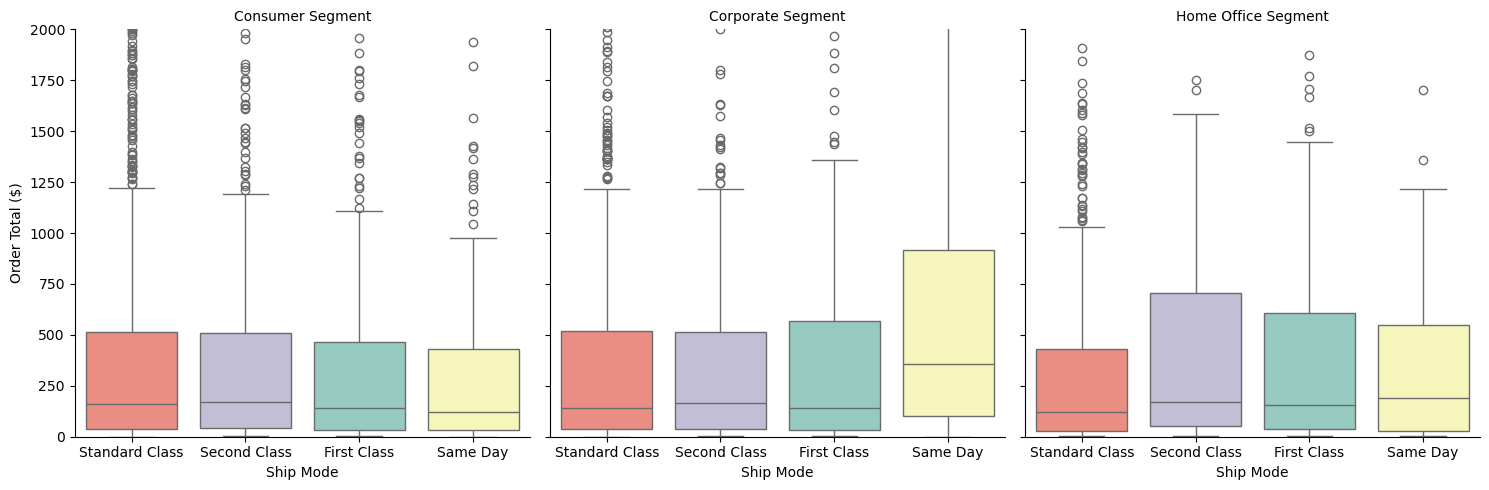

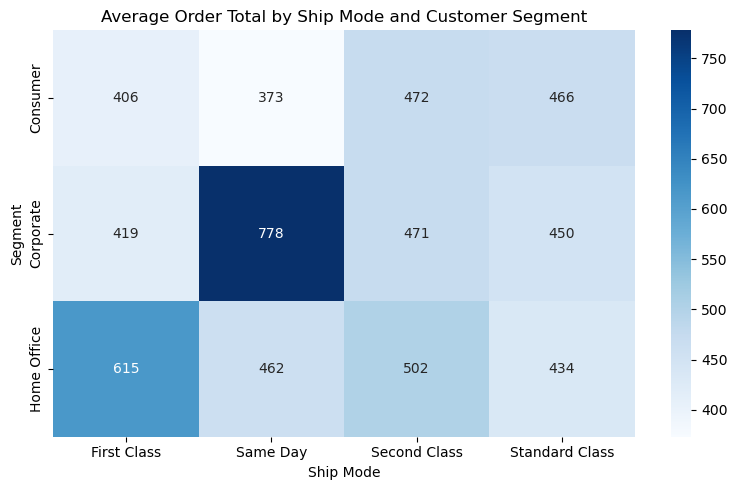

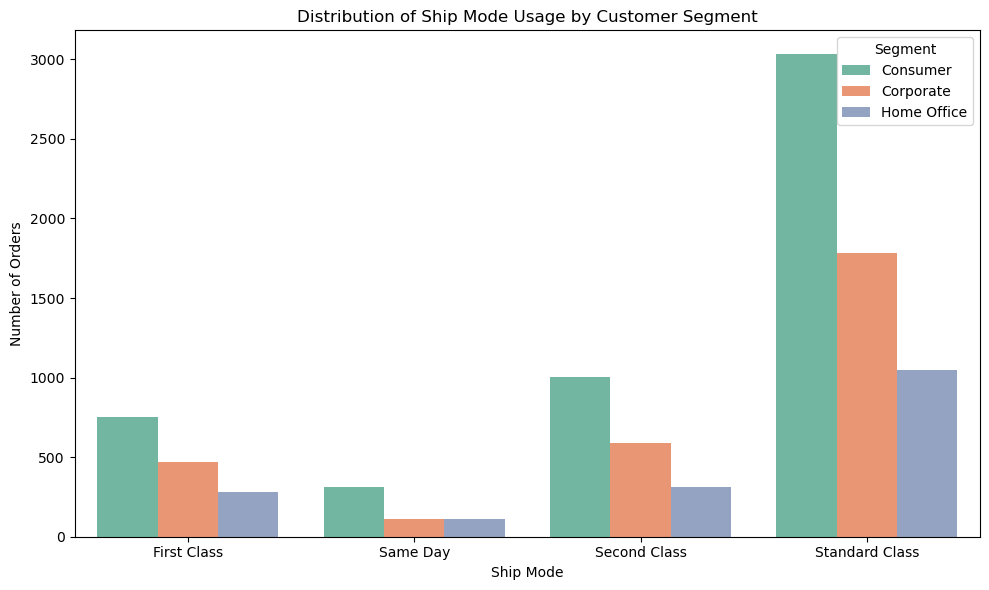

In [35]:
# price and ship mode
'''
plt.figure(figsize=(10,6))
sns.boxplot(
    data=order_prices,
    x='Ship Mode',
    y='OrderTotal',
    palette='Set2',
    hue='Ship Mode',
    legend = False
)
plt.title("Order Total Distribution by Ship Mode")
plt.xlabel("Ship Mode")
plt.ylabel("Order Total ($)")
plt.tight_layout()
plt.show()
'''
#replot with relevant y limits

plt.figure(figsize=(10,6))
sns.boxplot(
    data=order_prices,
    x='Ship Mode',
    y='OrderTotal',
    palette='Set2',
    hue='Ship Mode',
    legend = False
)
plt.title("Order Total Distribution by Ship Mode")
plt.xlabel("Ship Mode")
plt.ylabel("Order Total ($)")
plt.ylim(0,2000)
plt.tight_layout()
plt.show()

#segment shipping methods
'''
fig = sns.FacetGrid(
    order_prices,
    col='Segment',
    height=5,
    aspect=1
)

fig.map_dataframe(
    sns.boxplot,
    x='Ship Mode',
    y='OrderTotal',
    palette='Set3',
    order=order_prices['Ship Mode'].value_counts().index,
    hue='Ship Mode',
    legend = False
)

fig.set_axis_labels("Ship Mode", "Order Total ($)")
fig.set_titles("{col_name} Segment")
plt.tight_layout()
plt.show()

pivot = order_prices.pivot_table(
    index='Segment',
    columns='Ship Mode',
    values='OrderTotal',
    aggfunc='mean',
    observed = True
)
'''
#segment shipping methods with limited y axis
fig = sns.FacetGrid(
    order_prices,
    col = 'Segment',
    height = 5,
    aspect = 1
)

fig.map_dataframe(
    sns.boxplot,
    x = 'Ship Mode',
    y = 'OrderTotal',
    palette = 'Set3',
    order = order_prices['Ship Mode'].value_counts().index,
    hue = 'Ship Mode',
    legend = False
)

fig.set_axis_labels("Ship Mode", "Order Total ($)")
fig.set_titles("{col_name} Segment")
plt.ylim(0,2000)
plt.tight_layout()
plt.show()

pivot = order_prices.pivot_table(
    index = 'Segment',
    columns = 'Ship Mode',
    values = 'OrderTotal',
    aggfunc = 'mean',
    observed = True
)

#heatmap

plt.figure(figsize=(8,5))
sns.heatmap(
    pivot,
    annot = True,
    fmt=".0f",
    cmap="Blues"
)
plt.title("Average Order Total by Ship Mode and Customer Segment")
plt.ylabel("Segment")
plt.xlabel("Ship Mode")
plt.tight_layout()
plt.show()

#mode used by segment type
plt.figure(figsize=(10,6))
sns.countplot(
    data = df,
    x = 'Ship Mode',
    hue='Segment',
    palette='Set2'
)
plt.title("Distribution of Ship Mode Usage by Customer Segment")
plt.xlabel("Ship Mode")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()

### Question 7: Analysis
The table above the plots, shows that there are extreme outliers in each categeory. Some customers spend less than \$2 and choose same day shipping, and others will have large spends and still choose standard shipping. The first plot shows that standard shipping has a smaller order total with similar a similar mean, but the other shipping methods don't show much distinction. Looking at the plot faceted by segment, corporate same day shipments tend to be the most expensive. Looking at the heatmap on average Home Office spends the most per order on first class. This could be due to just outliers, more analysis would be needed to figure this out. The corporate segments has their most expensive orders on aver done on same day orders. Convsumers Tend to choose first or second class with their higher price orders. The distribution of shipping mode by customer segment shows that Consumers have the most orders, and they significantly preefer Standard Class as a whole. Home Office customers also prefer Standard Class but First Class and Second Class are balanced in preference and same day is smaller. Corporate customers still have the most ordders in Standard Class but also shows a similar trend to Home Office customers that First and Second Class are close with Same Day being less.

# Geography (If Time)
1. What are the outlying states for purchase amount and frequency?
1. What are the outlying cities for purchase amount and frequency?
1. How are sales broken down by state and then within each state at the city level?
1. If additional time is available, map the sales by state as a whole and by individual cities